# Examining Factors Responsible for Heart Attacks

# Problem Statement

Cardiovascular diseases (CVD) are a group of disorders of the heart and blood vessels. According to the World Health Organization (WHO), "Cardiovascular Disease is a major cause of disability and premature death throughout the world, and contributes substantially to the escalating costs of healthcare."[1]     Early detection for the disease can play an essential role in improving  health outcomes.  Interventions such as disease management, counseling, and medication therapy can lead to a reduction in heart related mortality rates. It is therefore of great significance to develop a method for isolating the risk factors and targeting the high-risk population.  In this analysis we will explore the potential of Machine Learning Algorithms, in particular Logistic Regression for predicting disease outcomes. 

There are a combination of controllable and uncontrollable risk factors when it comes to CVD. It is widely considered among the medical community that high blood pressure and elevated cholesterol levels are two controllable risk factors for the disease.  Among the risk factors that cannot be controlled are age and gender. In this analysis we will study both types of contributing factors for CVD.


The analysis will aim to outline an understanding for the relationship between the predictor features and a response
variable. The dataset consists of one binary response variable (target) and thirteen predictors such as age, chest pain type, and cholesterol level.   

**Goal:**  Study and analyze the data for n=303 patients and their data points. Examine and identify the factors that may play a role in increasing the prevalence of CVD.  Utilizing the predictor variables, develop and train a model that will predict a patients risk of developing or having CVD.

##### **Application of the analysis will be performed using Python and Tableau**

#  Data Collection

## Initialize environment/import libraries/import data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
from scipy.stats import chi2

from matplotlib.cbook import boxplot_stats

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from termcolor import colored

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in the data table
dfm = pd.read_excel('data.xlsx') #import the dataframe "m for main"

In [3]:
#sample the dataframe
dfm.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data specification

## Dataframe structure

In [4]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Three-hundred and three patient entries and fourteen variables were read into pandas. The summary above indicates that we have no null (missing) values in our dataframe. However, we need to confirm the validity of the values for each feature and study the invalid values. Process the invalid data accordingly. Note: all features were read into pandas as numerical values (int or float).  In the next steps we will investigate the dataframe and re-examine those features which are categorical in nature.

# Data Pre-processing

## Categorical variables

To identify the data features which are categorical in nature, we will look at the unique values of each feature. We will assume a threshold of 5 for the # of unique values a variable should have no more of to be 
considered a categorical variable.  We will assume the boolean, yes/no, 1/0 columns are category 
type variables. 

Study unique values for each feature.

In [5]:
#count unique values for each of the variables
u_counts = pd.DataFrame.from_records([(col, dfm[col].nunique()) for col in dfm.columns],
                                     columns=['column_name', 'count_unique']).sort_values(by=['count_unique'])

uc=u_counts.set_index('column_name')
print(uc.transpose())

column_name   sex  fbs  exang  target  restecg  slope  cp  thal  ca  oldpeak  \
count_unique    2    2      2       2        3      3   4     4   5       40   

column_name   age  trestbps  thalach  chol  
count_unique   41        49       91   152  


List all column features.

In [6]:
all_var = []             #initialize 
threshold = 0            #set threshold for unique values count
for each in dfm.columns: 
    if dfm[each].nunique() > threshold:
        all_var.append(each)
print(np.transpose(all_var))

['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'target']


Identify potential categorical features by examining the count of unique values per feature.

In [7]:
category_var = []        #initialize 
threshold = 5            #set threshold for unique values count
for each in dfm.columns: #for each column with unique values <= 5, add the column to category_var
    if dfm[each].nunique() <= threshold:
        category_var.append(each)
print(category_var)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


List numeric features.

In [8]:
numeric_var = []         #initialize 
threshold = 5            #set threshold for unique values count
for each in dfm.columns: #for each column with unique values >5 add the column to numeric_var
    if dfm[each].nunique() > threshold:
        numeric_var.append(each)
print(numeric_var)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


## Invalid values 

Now that we have identified the categorical variables, let us check for invalid values in our dataset.  Using the data specification requirements from above, review the counts associated with each of the valid values for each feature.  We can do a visual inspection for the given dataset.

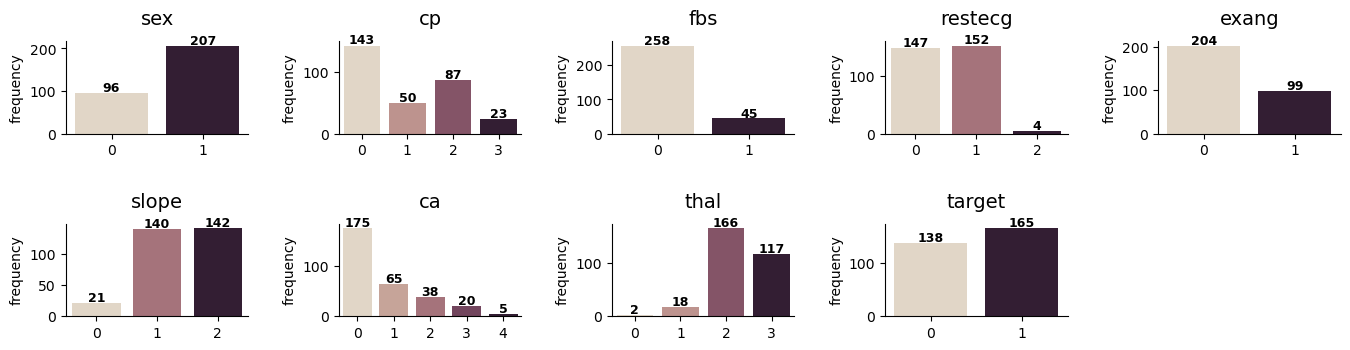

In [9]:
plt.style.use('default')
fig = plt.figure(figsize=(14,4))

for i in enumerate(category_var):
    plt.subplot(2,5,i[0]+1)
    ax=sns.countplot(data=dfm, x=i[1],palette="ch:.25")
    sns.despine()
    ax.set_title(i[1], fontsize=14, pad=12)
    ax.set_facecolor("white")
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_xlabel("",fontsize = 13)
    ax.set_ylabel("frequency",fontsize = 10)
    plt.tight_layout()
    for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2., height + 3, height ,ha="center",fontsize=9, weight="bold")

fig.tight_layout(pad=2.5)           
plt.show()
 

**Observations:** Based on the data specs above, features ca and thal appear to have invalid entries ('4' and '0', respectively). Rather than delete the records with invalid data, we will impute the features with new values so as to preserve the records for our study. The value '4' for ca and '0' for thal will be reassigned the mode value per feature. Note that we have a nearly balanced target variable;  approximately,  45%, 55% distribution split in our target variable with the majority of the population having heart disease (target = 1, 165 patients have heart disease).

In [10]:
mode_ca = dfm['ca'].mode().iat[0]
dfm['ca'].replace(to_replace=4, value=mode_ca, inplace = True)


mode_thal = dfm['thal'].mode().iat[0]
dfm['thal'].replace(to_replace=0, value=mode_thal, inplace = True)

The two records where thal = 0 have been updated to mode value = 2.  The five records where ca has value = 4 have been updated to mode value = 0. Validating updates made to ca and thal.

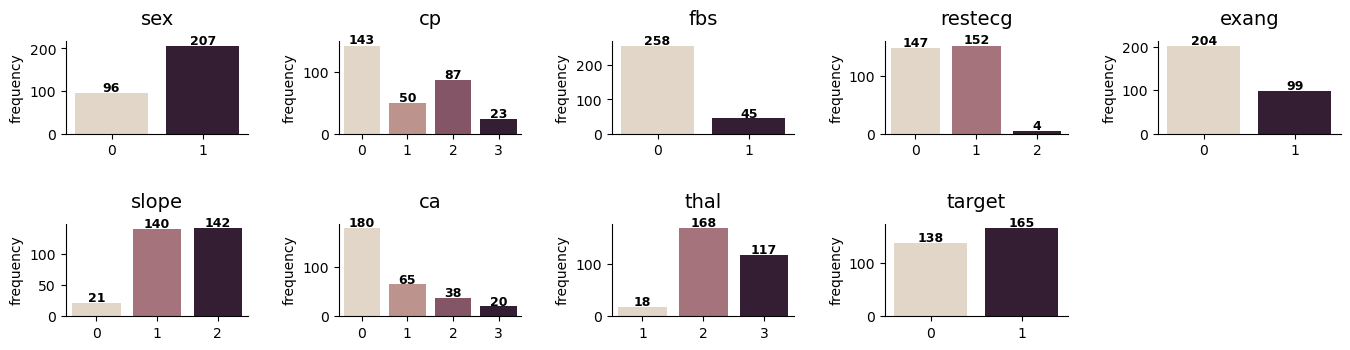

In [11]:

fig = plt.figure(figsize=(14,4))

for i in enumerate(category_var):
    plt.subplot(2,5,i[0]+1)
    ax=sns.countplot(data=dfm, x=i[1],palette="ch:.25")
    sns.despine()
    ax.set_title(i[1], fontsize=14, pad=12)
    ax.set_facecolor("white")
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_xlabel("",fontsize = 13)
    ax.set_ylabel("frequency",fontsize = 10)
    plt.tight_layout()
    for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2., height + 3, height ,ha="center",fontsize=9, weight="bold")

fig.tight_layout(pad=2.5)           
plt.show()

## Missing values 

In [12]:
dfm.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Remove duplicates

We are assuming this is data entered for the same patient more than once.

In [13]:
duplicates = dfm[dfm.duplicated(keep=False)]  #identify the duplicates
duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,0,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,0,2,1


In [14]:
dfm.drop_duplicates(inplace=True)   # drop duplicate

## Variable conversion

In [15]:
dfe = dfm.copy()  #make copy of dfm , add data with expanded feature descriptions

Reassign data type "category" to the categorical features.

In [16]:
for col in [category_var]:
    dfe[col] = dfe[col].astype("category")

In [17]:
dfe['sex'].replace(0, 'female', inplace = True)
dfe['sex'].replace(1, 'male', inplace = True)

dfe['cp'].replace(0, 'typical', inplace = True)
dfe['cp'].replace(1, 'atypical', inplace = True)
dfe['cp'].replace(2, 'non-anginal', inplace = True)
dfe['cp'].replace(3, 'asymptomatic', inplace = True)

dfe['fbs'].replace(0, '< 120mg/dl', inplace = True)
dfe['fbs'].replace(1, '> 120mg/dl', inplace = True)

dfe['restecg'].replace(0, 'normal', inplace = True)
dfe['restecg'].replace(1, 'abnormality', inplace = True)
dfe['restecg'].replace(2, 'hypertrophy', inplace = True)

dfe['exang'].replace(0, 'no', inplace = True)
dfe['exang'].replace(1, 'yes', inplace = True)

dfe['slope'].replace(0, 'upsloping', inplace = True)
dfe['slope'].replace(1, 'flat', inplace = True)
dfe['slope'].replace(2, 'downsloping', inplace = True)

dfe['thal'].replace(1, 'normal', inplace = True)
dfe['thal'].replace(2, 'fixed defect', inplace = True)
dfe['thal'].replace(3, 'reversible defect', inplace = True)

dfe['target'].replace(0, 'no cvd', inplace = True)
dfe['target'].replace(1, 'with cvd', inplace = True)

In [18]:
#Bin age groups
dfe['age_by_decade'] = pd.cut(x=dfe['age'], 
                             bins=[9,19,29,39,49,59,69,79,89,99], 
                             labels=['10','20s','30s','40s','50s','60s','70s','80s','90s'])

In [19]:
dfe.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_by_decade
0,63,male,asymptomatic,145,233,> 120mg/dl,normal,150,no,2.3,upsloping,0,normal,with cvd,60s
1,37,male,non-anginal,130,250,< 120mg/dl,abnormality,187,no,3.5,upsloping,0,fixed defect,with cvd,30s


## Preliminary Statistical Summary 

### Categorical data

In [20]:
dfe.describe(include="category")

,sex,cp,fbs,restecg,exang,slope,ca,thal,target,age_by_decade
count,302,302,302,302,302,302,302,302,302,302
unique,2,4,2,3,2,3,4,3,2,6
top,male,typical,< 120mg/dl,abnormality,no,downsloping,0,fixed defect,with cvd,50s
freq,206,143,257,151,203,141,179,167,164,125


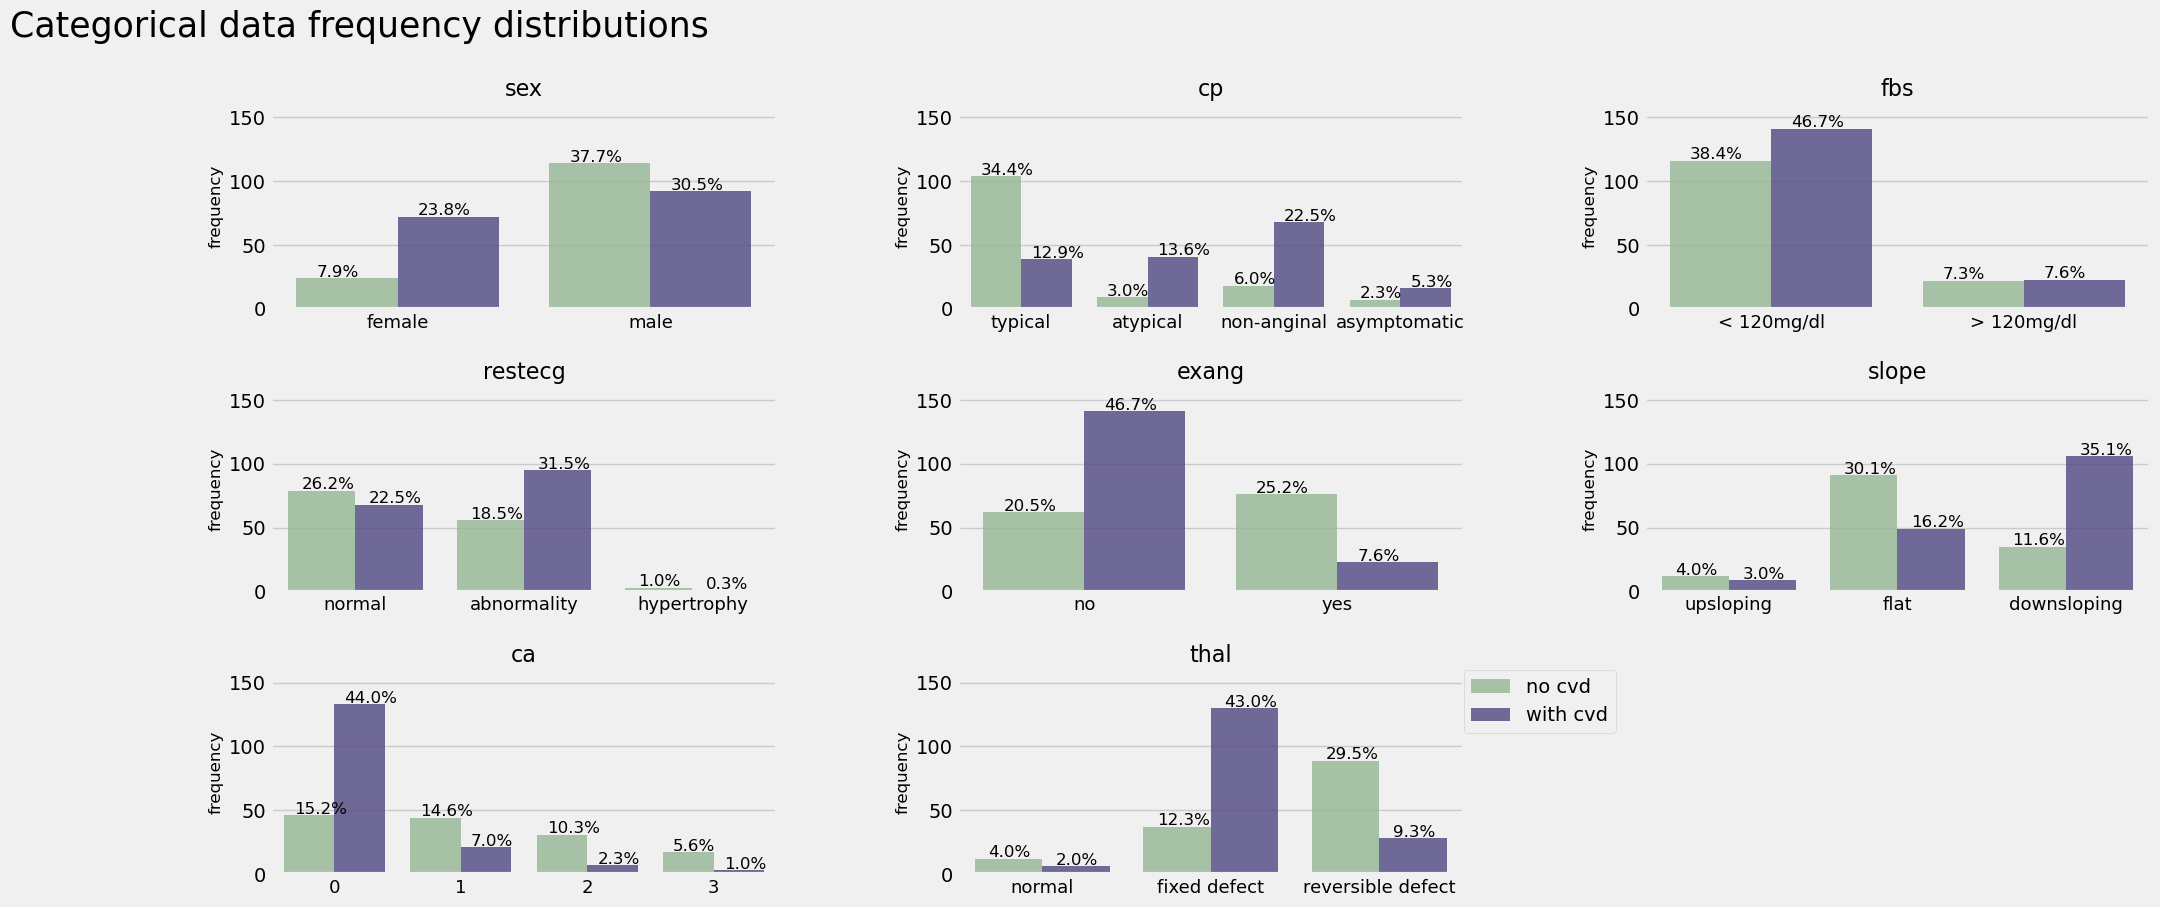

In [21]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(20,12))
fig.suptitle('Categorical data frequency distributions', fontsize=25, x=0.09) 
for i in enumerate(category_var[:-1]):
    plt.subplot(4,3,i[0]+1)
    ax=sns.countplot(data=dfe, x=i[1],hue=dfe.target,palette=['darkseagreen','darkslateblue'], alpha=0.8)
    ax.set_ylim(0,160)
    ax.set_title(i[1], fontsize=16)
    ax.get_legend().remove()   
    ax.tick_params(axis='x', labelsize=13)
    ax.set_xlabel("",fontsize = 15)
    ax.set_ylabel("frequency",fontsize = 12)
    totals = []
    for p in ax.patches:
        totals.append(p.get_height())
        total = sum(totals)
    for p in ax.patches:
        ax.text(p.get_x()+.08, p.get_height()+1.2, \
                str(round((p.get_height()/total)*100, 1))+'%', fontsize=12,color='black')

plt.legend(bbox_to_anchor=(1.0,1.0), loc='upper left', borderaxespad=0.,prop={'size': 14})

fig.tight_layout(pad=1.5)
plt.show()

 

**Preliminary observations for categorical features :** Gender distribution skewed with ~68% of the data for males and ~32% for females. Nearly 85% of the patients had fasting blood sugar (fbs) levels <120mg/dl. Regardless of disease response variable ("with cvd", or "no cvd"), fbs levels will tend to read <120mg/dl. Feature thal will need to be examined in some detail to understand the low instance for "normal" results in the given population.     

### Numerical data

In [22]:
numeric_dfm = dfm[numeric_var]  
np.transpose(numeric_dfm.describe())

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


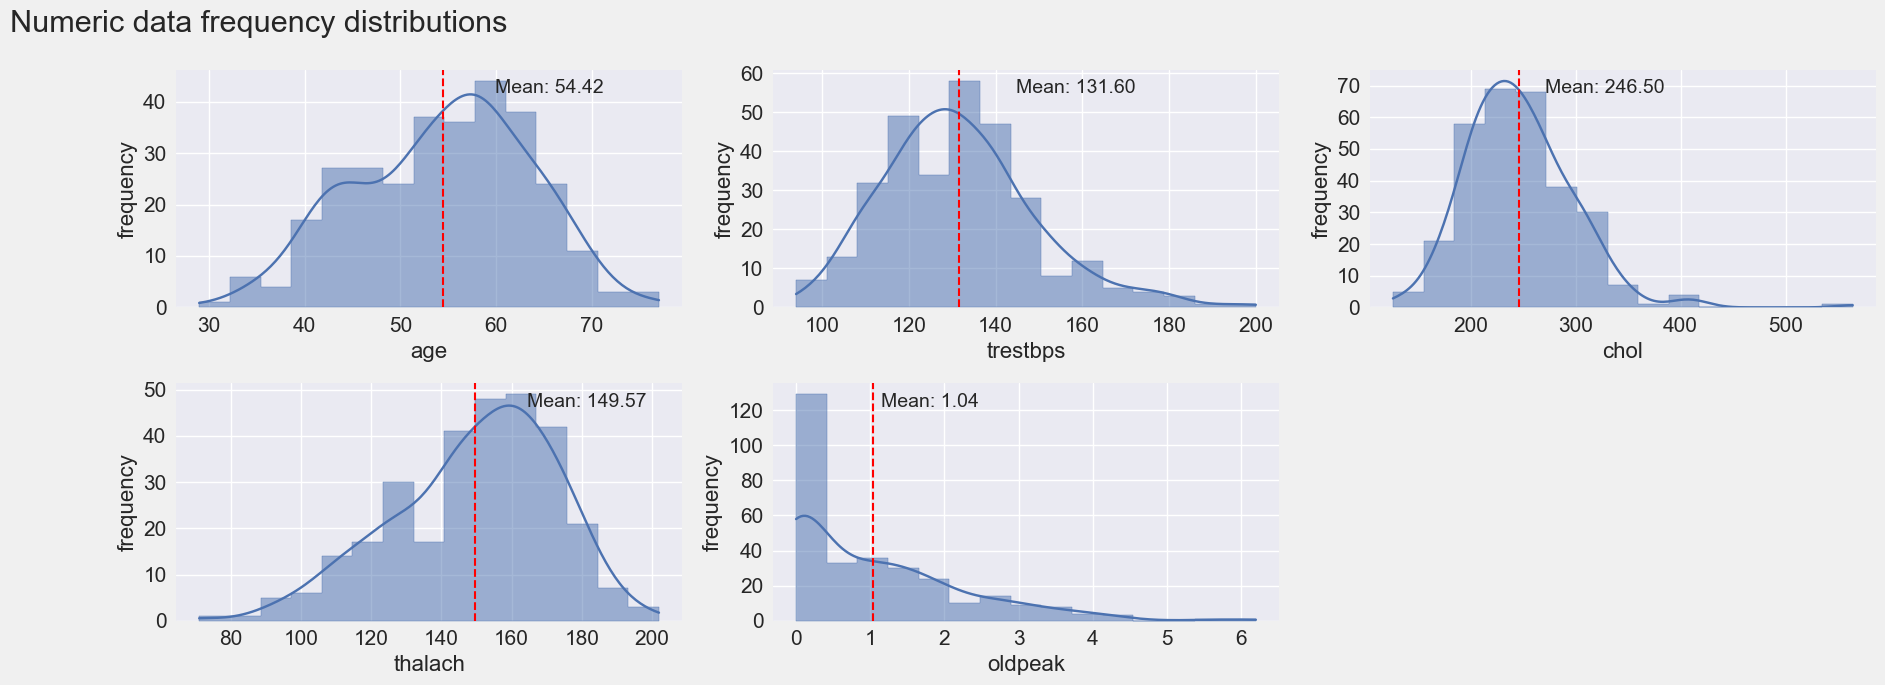

In [23]:
fig=plt.figure(figsize=(18,7))
plt.style.use('seaborn')
fig.suptitle('Numeric data frequency distributions', fontsize=22, x=0.09) 
for i in enumerate(numeric_var):
    plt.subplot(2,3,i[0]+1)
    ax=sns.histplot(data=dfm, x=i[1],element='step',palette=['darkslateblue'],bins=15, kde=True)
    plt.xlabel(i[1],  fontsize=16)
    plt.ylabel("frequency", fontsize=16)
    plt.axvline(x=dfm[i[1]].mean(),ls='--', lw=1.5, c='r')
    plt.setp(ax.get_xticklabels(), fontsize=15)
    plt.setp(ax.get_yticklabels(), fontsize=15)
    min_ylim, max_ylim = plt.ylim()
    plt.text(dfm[i[1]].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(dfm[i[1]].mean()))
plt.tight_layout()
        
plt.show()

 

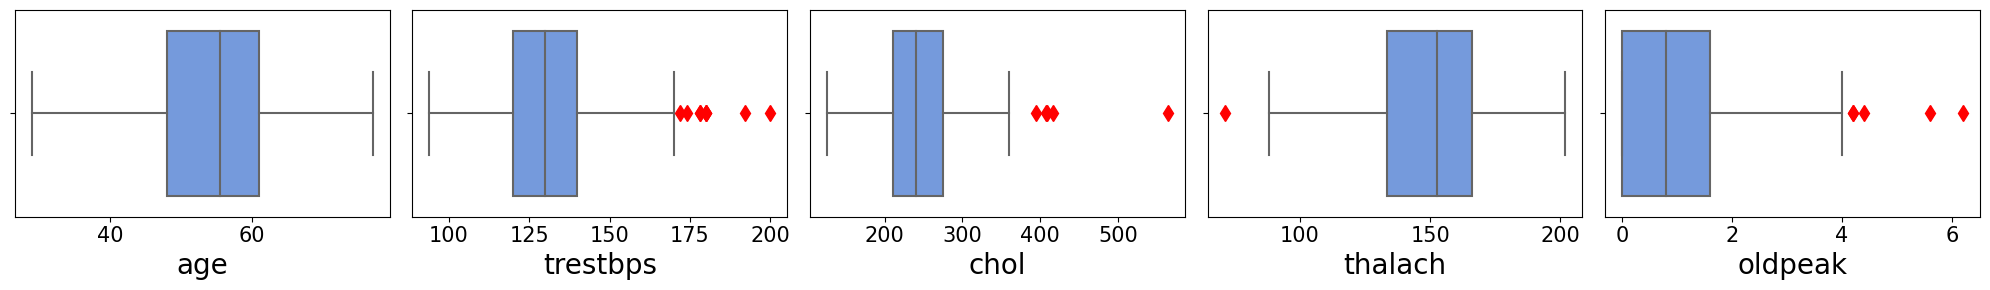

In [24]:
plt.figure(figsize=(20,3))
plt.style.use('default')
flierprops = dict(marker='d', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='r')
for i in enumerate(numeric_var):
    plt.subplot(1,5,i[0]+1)
    ax=sns.boxplot(data=dfm, x=i[1], color='cornflowerblue' , orient='h', flierprops=flierprops)
    plt.xlabel(i[1],  fontsize=20)
    ax.tick_params(axis='x', labelsize=15 )
    plt.tight_layout()
    
plt.show()

 

**Preliminary observations for numerical features:** Patient ages range from 29 to 77 years old with a mean age of 54. The standard deviation for features resting blood pressure (trestbps), thalach (max heart rate achieved), and cholesterol levels (chol) are elevated indicating values with high diversion from the mean. Mean score for these attributes needs to be studied further and outliers data analyzed. From boxplot figure we can see there are potential outliers for each of the numeric variables with exception for age. Numeric data distributions appear normally distributed with exception for feature oldpeak. 

**Using pairplot to highlight relationships between the features**

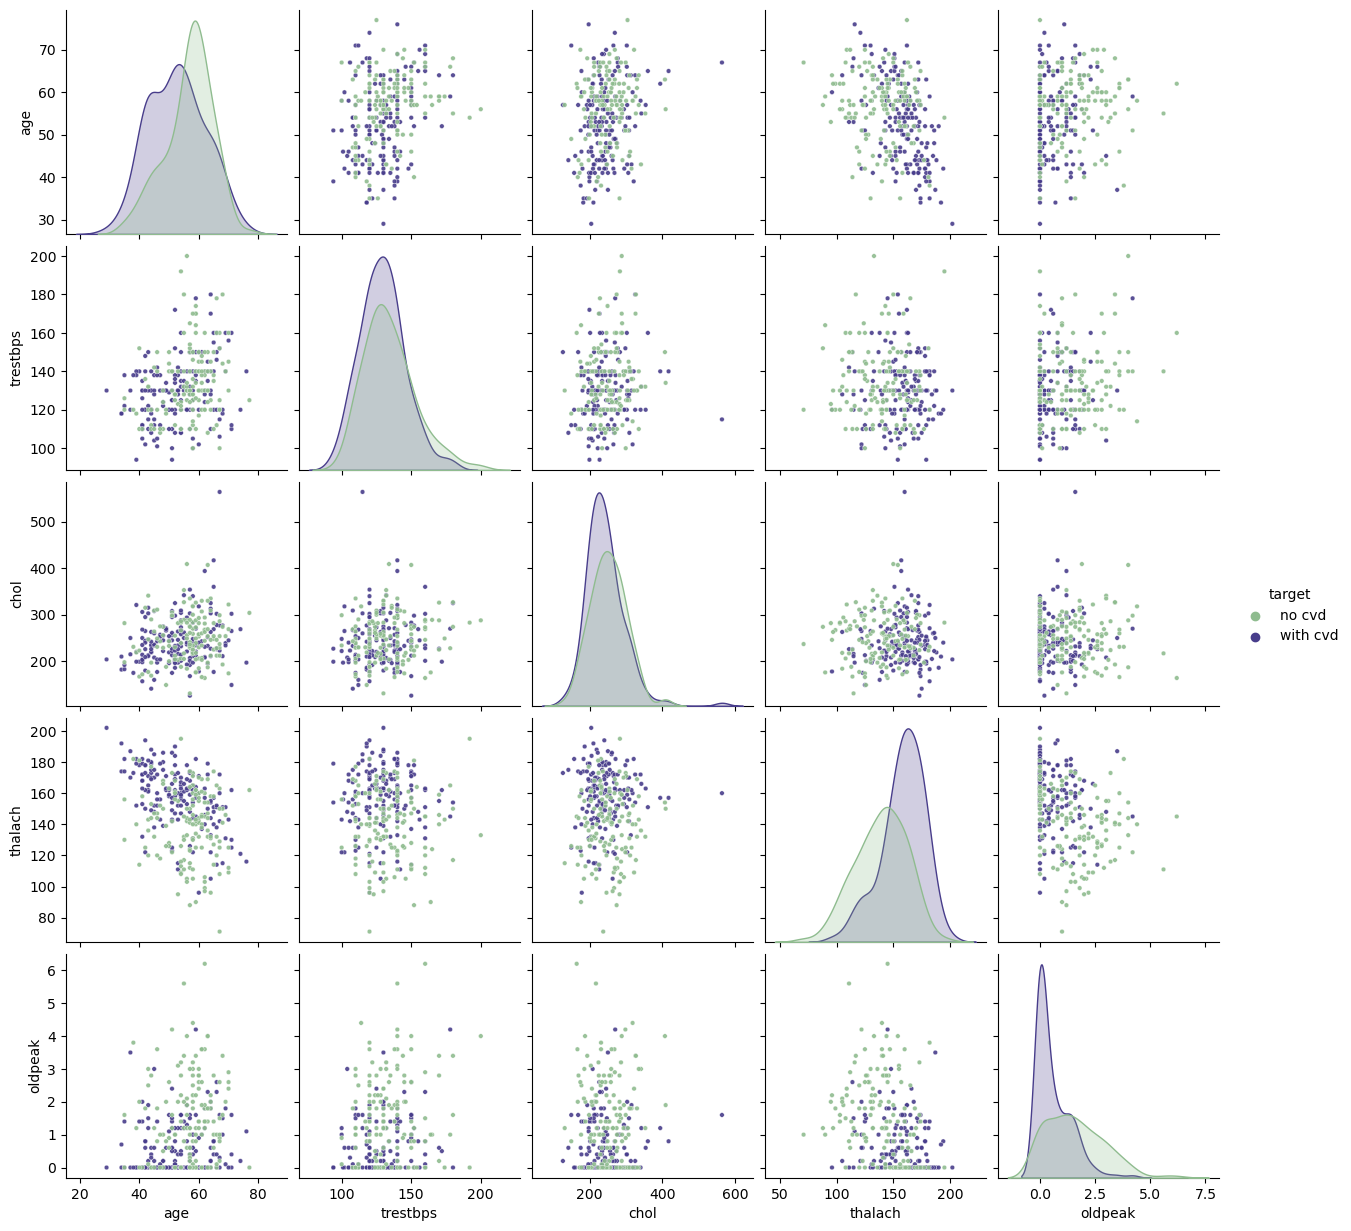

In [25]:
plt.style.use('default')

g=sns.pairplot(data=dfe,  palette=['darkseagreen','darkslateblue'], hue="target", 
            diag_kind="kde", plot_kws={"s":11,'alpha':0.9},corner=False)

plt.show()

**Observations:** Potential linear correlation (negative direction) between age and thalach for the "with cvd" cohorts. This may indicate that as age increases the maximum heart rate achieved will be lower. In studying the relationship between oldpeak and each of the other numeric attributes we can note the "with cvd" cohorts tend to lie on the low end (< 1) of the scale for oldpeak.  The thalach data points for the "with cvd" population tend to sit on the upper end of the scale. The scatter distribution illustrates some potential outliers in the data.  These are the data points resting considerably further away from the clustered data points.

# Exploratory Data Analysis

## Numeric Data 

**Relationship of CVD (response variable) to the numeric predictor variables**

Let us study the distribution of and relationship between the predictor (independent) variables relative to the response (dependent) variable for CVD. To study the relationship between our continuous numeric attributes and the response target variable we will employ the Point Biserial Correlation (PBS) test. Given that the target feature is dichotomous nominal data (0,1), we use a PBS test to measure the strength of the relationship between the variables.

### Age

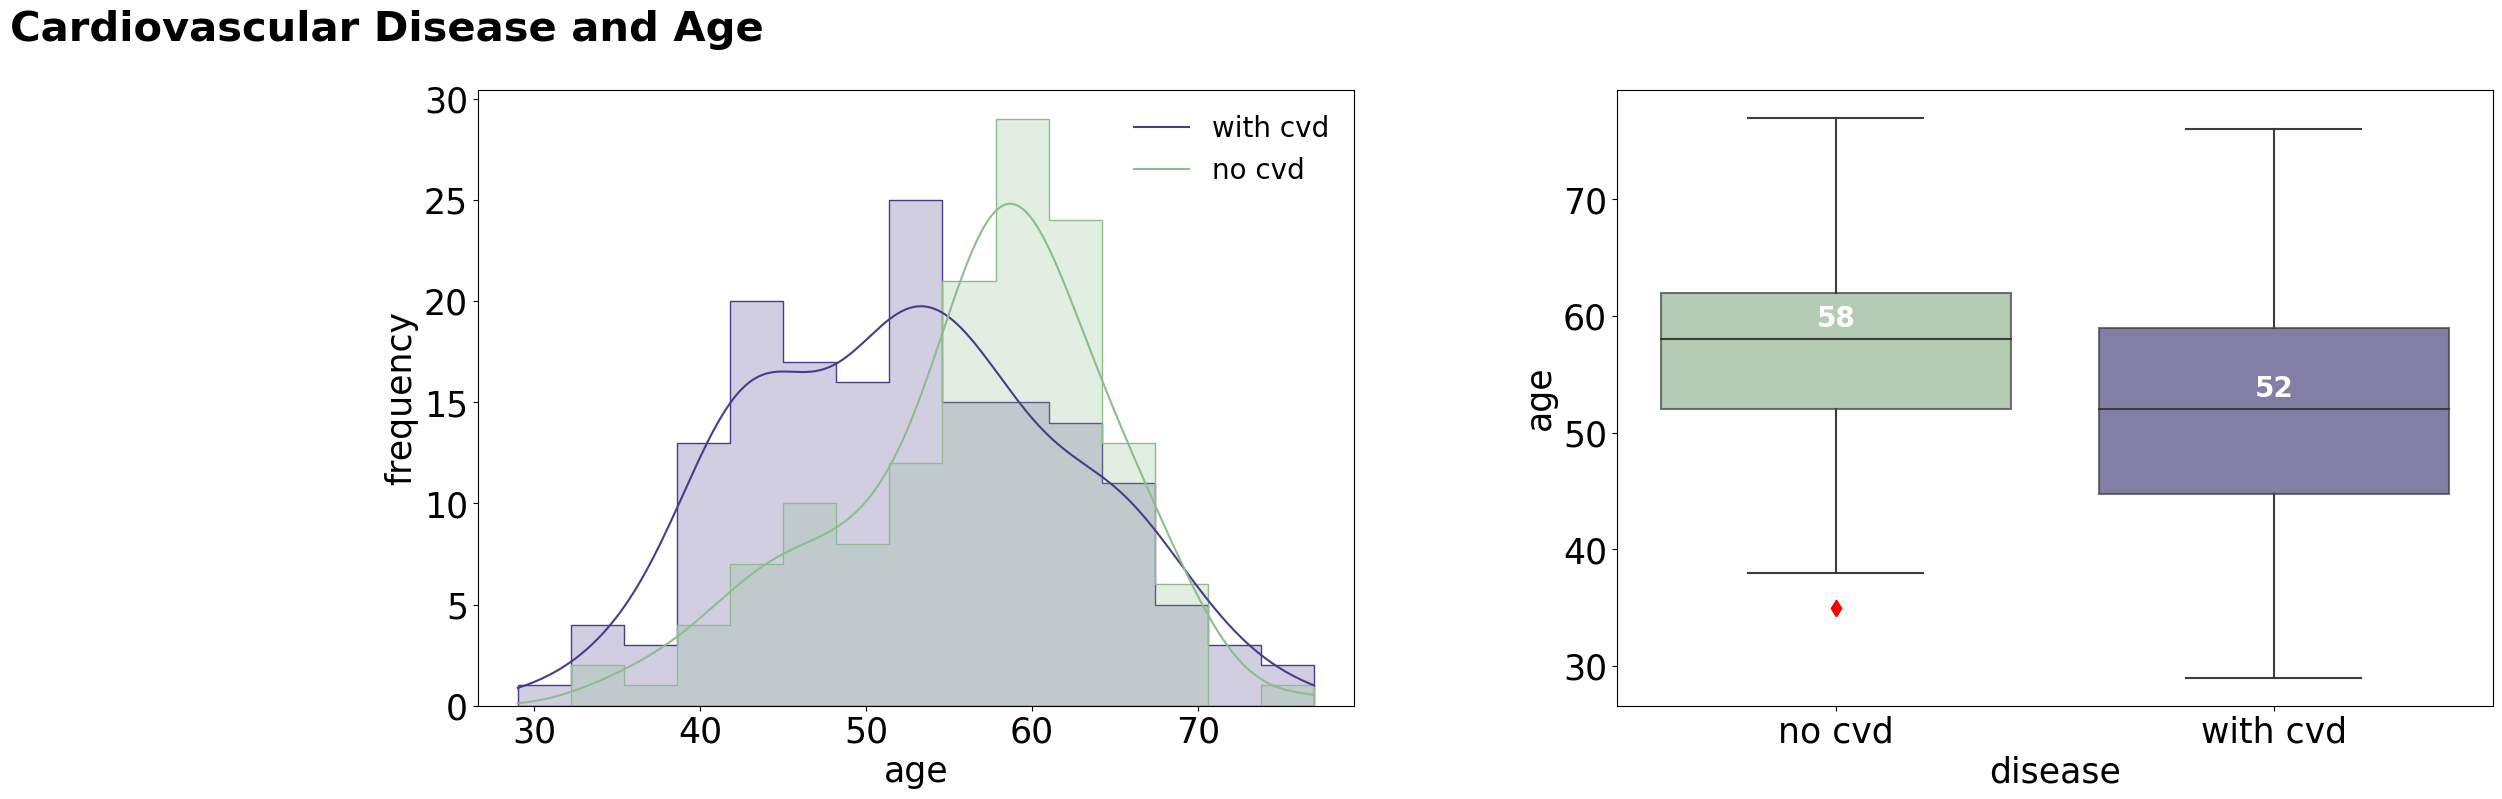

In [26]:
plt.style.use('default')
for i in enumerate(numeric_var[:1]):

    title = i[1]    
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(26,8))
    fig.suptitle('Cardiovascular Disease and ' + title[0].upper() + title[1:], fontsize=30, fontweight="bold", x=0.09)
     
    # = disease histplot
    sns.histplot(data=dfm, x=i[1],hue='target',element='step',palette=['darkseagreen','darkslateblue'], kde=True,
                 bins=15,ax=ax1)
    plt.setp(ax1.get_xticklabels(), fontsize=25)
    plt.setp(ax1.get_yticklabels(), fontsize=25)
    ax1.set_xlabel(i[1], fontsize=25)
    ax1.set_ylabel('frequency',fontsize=25)
    ax1.legend(title='', labels=['with cvd','no cvd'], frameon=False, fontsize=20)
    
     
    # = disease boxplot
    sns.boxplot(data=dfm, x=dfm.target, y=i[1], palette=['darkseagreen','darkslateblue'], orient='v',
                flierprops=flierprops, boxprops=dict(alpha=.7), ax=ax2)
    ax2.set_xticklabels(["no cvd", "with cvd"], fontsize=25)
    plt.setp(ax2.get_yticklabels(), fontsize=25)
    ax2.set_xlabel('disease', fontsize=25)
    ax2.set_ylabel(i[1], fontsize=25)
    
    medians = dfm.groupby(['target'])[i[1]].median()
    vertical_offset = dfm[i[1]].median() * 0.02 # offset from median for display
    for xtick in ax2.get_xticks():
        ax2.text(xtick,medians[xtick] + vertical_offset,medians[xtick],
                 horizontalalignment='center',fontsize=20,color='w',weight='bold')
        
fig.subplots_adjust(wspace=0.3)
plt.show()

 

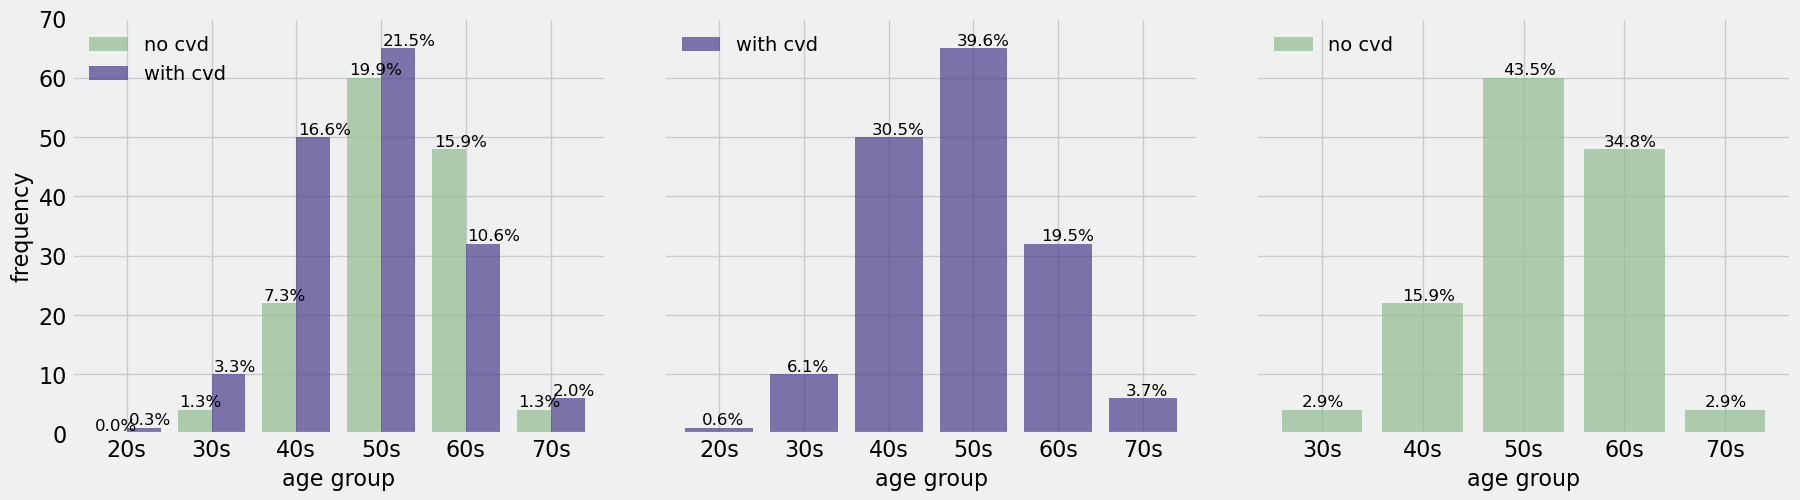

In [27]:
plt.style.use('fivethirtyeight')

wi_cvde = dfe[(dfe['target'] == 'with cvd')] #with cvd
no_cvde = dfe[(dfe['target'] == 'no cvd')]   #without cvd

#cross tab tables
ct = pd.crosstab( dfe.age_by_decade, dfe.target, normalize=False, margins=False)               #all
ct_with = pd.crosstab(wi_cvde.age_by_decade,wi_cvde.target, normalize=False, margins=False)    #with cvd
ct_without = pd.crosstab(no_cvde.age_by_decade,no_cvde.target, normalize=False, margins=False) #no cvd

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,5), sharey=True)


#all
ct.plot(kind='bar', stacked=False, rot=0, color=('darkseagreen', 'darkslateblue'), width=.8, alpha=.7, ax = ax1)
#ax1.set_title('= all', fontsize=20)
ax1.set_ylim(0,70)
ax1.legend(title='',frameon=False, fontsize=14, loc=2)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.set_xlabel('age group',fontsize = 16)
ax1.set_ylabel("frequency",fontsize = 16)
totals = []
for p in ax1.patches:
    totals.append(p.get_height())
    total = sum(totals)
for p in ax1.patches:
    ax1.text(p.get_x()+0.02, p.get_height()+0.5, \
            str(round((p.get_height()/total)*100, 1))+'%', fontsize=12,color='black')

#with cvd
ct_with.plot(kind='bar', stacked=False, rot=0, color=('darkslateblue'), width=.8, alpha=.7, ax = ax2)
#ax2.set_title('= with cvd', fontsize=20)
ax2.legend(title='',frameon=False, fontsize=14, loc=2)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_xlabel('age group',fontsize = 16)
ax2.set_ylabel("frequency",fontsize = 20)
totals2 = []
for p in ax2.patches:
    totals2.append(p.get_height())
    total2 = sum(totals2)
for p in ax2.patches:
    ax2.text(p.get_x()+0.2, p.get_height()+0.5, \
            str(round((p.get_height()/total2)*100, 1))+'%', fontsize=12,color='black')
    
#no cvd
ct_without.plot(kind='bar', stacked=False, rot=0, color=('darkseagreen'), width=.8, alpha=.7, ax = ax3)
#ax3.set_title('= no cvd', fontsize=20)
ax3.legend(title='',frameon=False, fontsize=14, loc=2)
ax3.tick_params(axis='x', labelsize=16)
ax3.tick_params(axis='y', labelsize=20)
ax3.set_xlabel('age group',fontsize = 16)
ax3.set_ylabel("frequency",fontsize = 20)
totals3 = []
for p in ax3.patches:
    totals3.append(p.get_height())
    total3 = sum(totals3)
for p in ax3.patches:
    ax3.text(p.get_x()+0.2, p.get_height()+0.5, \
            str(round((p.get_height()/total3)*100, 1))+'%', fontsize=12,color='black')

fig.tight_layout(pad=0.5, w_pad=3.0)

plt.show()   

 

**Observations:** We can observe that the incidence for a positive diagnosis for CVD affects a particular age group, namely those cohorts in their 40's and 50's. Approximately 70% of the patients with the disease are patients in their 40's and 50's. Approximately 90% of those with the disease are between the ages of 40-69. Patients in their 50's makeup the majority of those with the disease, followed by those in their 40's (39.6% and 30.5%, respectively). The median age of those patients with cvd is 52, while those without the disease had a median age of 58. The age distributions for each cohort (with cvd, and no cvd) are slightly skewed in opposing degrees.  This is apparent in the histogram above. The direction of skew is outlined in the summary table below. The negative skew in age groups for the "no cvd" cohorts indicates that the age feature is skewed and the tail of the distribution is longer towards the left hand side of the curve. We would expect that the outliers in the data would lie in this area to the left.  A positive skewness value in the output for "with cvd" cohorts indicates an asymmetry in the distribution with the tail end larger towards the right hand side of the distribution.

In [28]:
for i in enumerate(numeric_var[0:1]):

    print(colored(("Statistical summary for feature - " + i[1] + ":"),'green',attrs=['bold']))
    print("")
    def my_agg(x):
        names = {
            'patients': x[i[1]].count(),
            'min'   : x[i[1]].min(),
            'max'   : x[i[1]].max(),
            'mean'  : x[i[1]].mean(),
            'median': x[i[1]].median(),
            'std'   : x[i[1]].std(),
            'skew'  : x[i[1]].skew(),
            'Q1'    : x[i[1]].quantile(.25),
            'Q3'    : x[i[1]].quantile(.75)
        }
        
        return pd.Series(names, index=['patients','min', 'Q1','median','Q3','max', 'mean','std','skew'])

    print (dfe.groupby('target').apply(my_agg).round(2))
    print ("")

Statistical summary for feature - age:

          patients   min     Q1  median    Q3   max   mean   std  skew
target                                                                
no cvd       138.0  35.0  52.00    58.0  62.0  77.0  56.60  7.96 -0.55
with cvd     164.0  29.0  44.75    52.0  59.0  76.0  52.59  9.51  0.12



For point biserial correlation testing we assume our null hypothesis (H0) to state that no correlation exists between the two variables (they are independent). The alternate hypothesis (H1) assumes that feature attributes (independent, predictor variables) and target (response variable) are not independent.

***Handling outliers for Point Biserial Correlation (PBS) test***

Given that the PBS test is sensitive to outliers data, we will create a copy of our dataframe excluding the outliers for the numeric features.  Our analysis portion of the data will continue to evaluate all data points in the data.

In [29]:
#Calculate upper and lower limit for the features
Q1 = dfm[numeric_var].quantile(0.25)
Q3 = dfm[numeric_var].quantile(0.75)
IQR = Q3 - Q1

#Create copy of the dataframe excluding the outliers
dfm2= dfm[~((dfm[numeric_var] < (Q1 - 1.5 * IQR)) |(dfm[numeric_var] > (Q3 + 1.5 * IQR))).any(axis=1)]

print('Shape of dataframe excluding outliers: ', dfm2.shape)

Shape of dataframe excluding outliers:  (283, 14)


In [30]:
coef, p  = pointbiserialr(dfm2.target, dfm2.age)
alpha = 0.05
for i in enumerate(numeric_var[0:1]):
    print(colored(("Point Biserial Correlation Test Results " + "(" +  i[1] + " & cvd)"+": "),'green',attrs=['bold']))
    print("")
    print('Point-Biserial correlation coefficient: %.3f' % coef)

    if p > alpha:
        print('Data are uncorrelated. Fail to reject H0. p-value = ' + "{:.2e}".format(p))
    else:
        print('Data are correlated. Reject H0. p-value = ' + "{:.2e}".format(p))

Point Biserial Correlation Test Results (age & cvd): 

Point-Biserial correlation coefficient: -0.222
Data are correlated. Reject H0. p-value = 1.62e-04


**age:** The p-value is less than 0.05. We reject the null hypothesis that no correlation exists between age and whether or not a patient has cvd.  The test is statistically significant. In rejecting the null hypothesis, we conclude that there is a relationship between age and cvd.  Our correlation coefficient describes the weight of the relationship as -0.222.

### Resting blood pressure

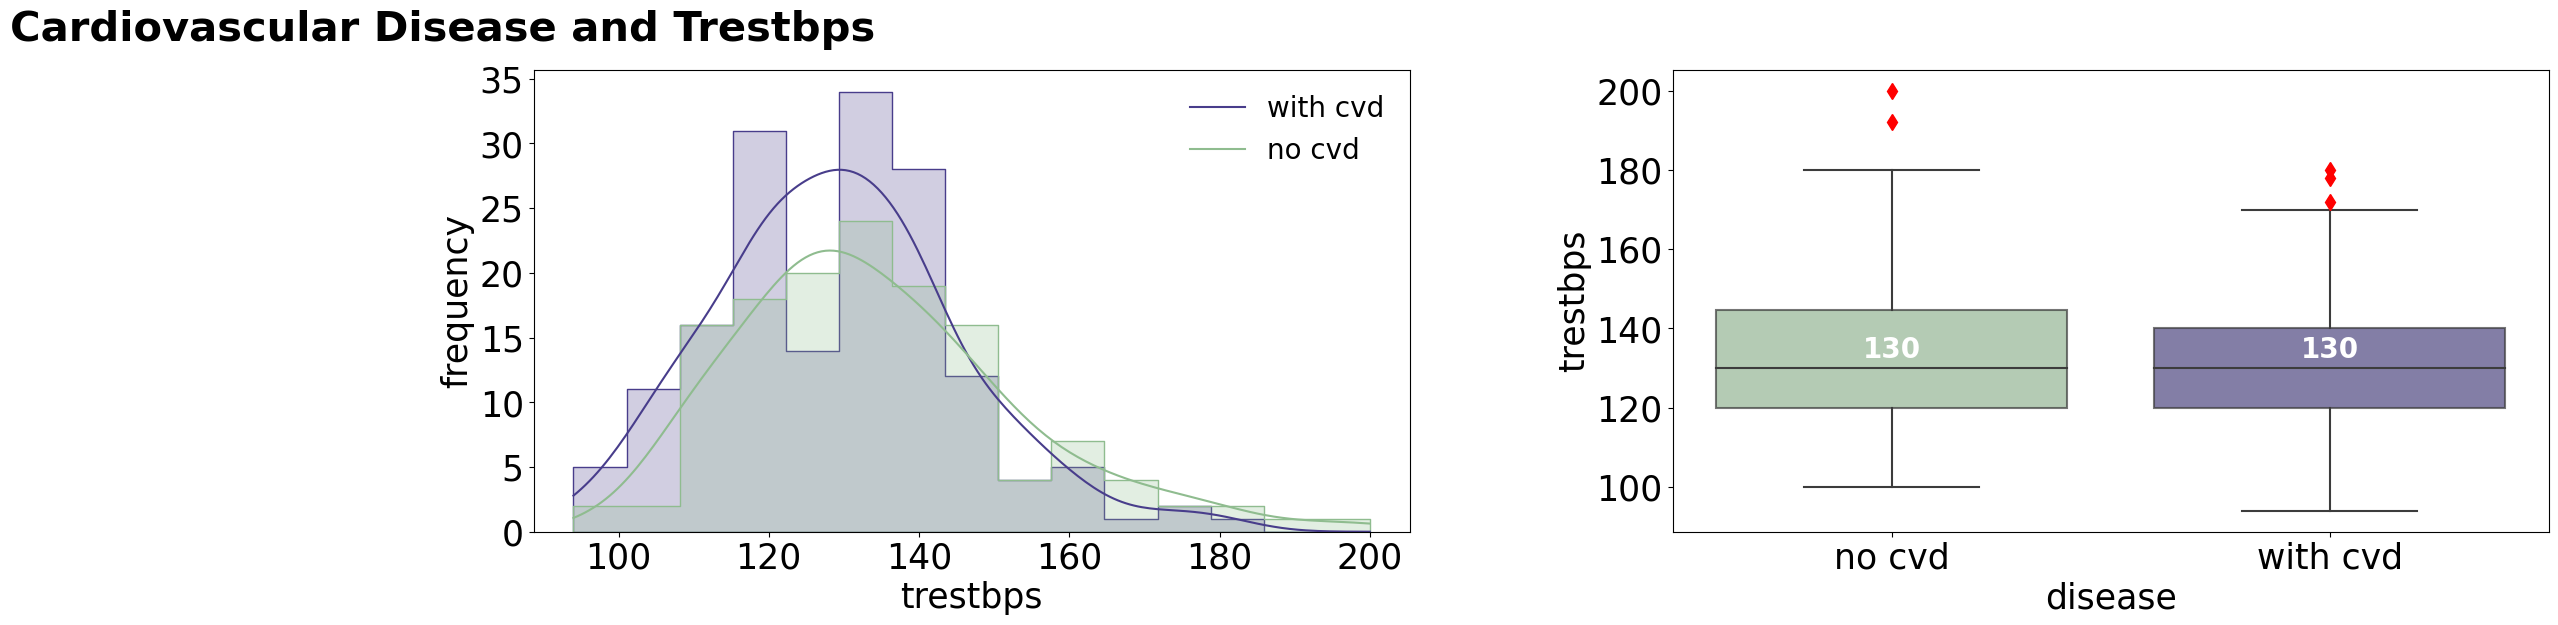

In [31]:
plt.style.use('default')
for i in enumerate(numeric_var[1:2]):

    title = i[1]    
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(26,6))
    fig.suptitle('Cardiovascular Disease and ' + title[0].upper() + title[1:], fontsize=30, fontweight="bold", x=0.09)
     
    # = disease histplot
    sns.histplot(data=dfm, x=i[1],hue='target',element='step',palette=['darkseagreen','darkslateblue'], kde=True,
                 bins=15,ax=ax1)
    plt.setp(ax1.get_xticklabels(), fontsize=25)
    plt.setp(ax1.get_yticklabels(), fontsize=25)
    ax1.set_xlabel(i[1], fontsize=25)
    ax1.set_ylabel('frequency',fontsize=25)
    ax1.legend(title='', labels=[ 'with cvd','no cvd'], frameon=False, fontsize=20)
    
     
    # = disease boxplot
    sns.boxplot(data=dfm, x=dfm.target, y=i[1], palette=['darkseagreen','darkslateblue'], orient='v',
                flierprops=flierprops, boxprops=dict(alpha=.7), ax=ax2)
    ax2.set_xticklabels(["no cvd", "with cvd"], fontsize=25)
    plt.setp(ax2.get_yticklabels(), fontsize=25)
    ax2.set_xlabel('disease', fontsize=25)
    ax2.set_ylabel(i[1], fontsize=25)
    
    medians = dfm.groupby(['target'])[i[1]].median()
    vertical_offset = dfm[i[1]].median() * 0.02 # offset from median for display
    for xtick in ax2.get_xticks():
        ax2.text(xtick,medians[xtick] + vertical_offset,medians[xtick],
                 horizontalalignment='center',fontsize=20,color='w',weight='bold')
        
fig.subplots_adjust(wspace=0.3)
plt.show()

In [32]:
for i in enumerate(numeric_var[1:2]):

    print(colored(("Statistical summary for feature - " + i[1] + ":"),'green',attrs=['bold']))
    print("")
    def my_agg(x):
        names = {
            'patients': x[i[1]].count().round(0),
            'min'   : x[i[1]].min(),
            'max'   : x[i[1]].max(),
            'mean'  : x[i[1]].mean(),
            'median': x[i[1]].median(),
            'std'   : x[i[1]].std(),
            'skew'  : x[i[1]].skew(),
            'Q1'    : x[i[1]].quantile(.25),
            'Q3'    : x[i[1]].quantile(.75)
        }
        
        return pd.Series(names, index=['patients','min', 'Q1','median','Q3','max', 'mean','std','skew'])

    print (dfe.groupby('target').apply(my_agg).round(2))
    print ("")

Statistical summary for feature - trestbps:

          patients    min     Q1  median      Q3    max    mean    std  skew
target                                                                      
no cvd       138.0  100.0  120.0   130.0  144.75  200.0  134.40  18.73  0.86
with cvd     164.0   94.0  120.0   130.0  140.00  180.0  129.25  16.20  0.43



**trestbps:** The resting blood pressure (trestbps) of those inflicted by the disease hovers over the 120 to 140 range. Note that there exists extreme values (outliers data) in resting blood pressure. These values may impact our statistical model where the skewed data can adversely influence the training of the model for predicting the outcome of cardiovascular diseases. In the sections to follow we will study the outliers data and determine a method for how to handle these data points.  The median blood pressure for both those groups with and without the disease is 130. The data for both groups is skewed with outliers lying to the extreme right.

In [33]:
coef, p  = pointbiserialr(dfm2.target, dfm2.trestbps)
alpha = 0.05
for i in enumerate(numeric_var[1:2]):
    print(colored(("Point Biserial Correlation Test Results " + "(" +  i[1] + " & cvd)"+": "),'green',attrs=['bold']))
    print("")
    print('Point-Biserial correlation coefficient: %.3f' % coef)

if p > alpha:
    print('Data are uncorrelated. Fail to reject H0. p-value = ' + "{:.2e}".format(p))
else:
    print('Data are correlated. Reject H0. p-value = ' + "{:.2e}".format(p))

Point Biserial Correlation Test Results (trestbps & cvd): 

Point-Biserial correlation coefficient: -0.116
Data are uncorrelated. Fail to reject H0. p-value = 5.20e-02


For p-value slightly greater than 0.05, we fail to reject the null hypothesis that no correlation exists between resting blood pressure and whether or not a patient has cvd.  In failing to reject the null hypothesis, we conclude that there is not enough evidence to show a correlation exists between resting blood pressure and cvd.

**Detecting incidence of CVD based on anomalies in resting blood pressure of the patient**

Studying anomalies in the data is crucial for developing machine learning prediction models. Anomalies may be defined as data points that deviate from common statistical measures of a distribution, for example the distribution mean and standard deviation. Data outliers are studied for their potential beneficial insights. How outliers are handled in machine learning algorithms is very much dependent on the source and/or cause for such data inconsistency.  Human error (data entry) and natural deviation are two possible reasons why outliers may exist in our data.  Identifying the root cause for outliers data can help influence the behavior for how to handle these data points in our prediction model. 

Let us look at the outliers data that exists for resting blood pressure (trestbps). In the scenario to follow we will look at detection of anomalies for resting blood pressure in the CVD data set. Specifically, we will study the outliers and determine their level of importance in the predication for CVD.

**Question: Can we detect CVD based on anomalies in resting blood pressure of a patient?**
Let us re-frame the question into a hypothesis and then test our hypothesis.
Let H0 equal our null hypothesis. 
Our null hypothesis statement: There is no correlation between resting blood pressure (outliers data) and whether or not a patient will have heart disease. The alternate hypothesis (H1) will assume that there exists a correlation between the outlier data for resting blood pressure (trestbps) and cvd.

Let us begin our analysis of the outliers data for a patients resting blood pressure.

**Find Outliers Using Tukey Method and IQR**


Tukey’s rule states that outliers are values more than 1.5 times the interquartile (IQR) range from the 
quartiles.  That is data points below Q1 − 1.5IQR, or above Q3 + 1.5IQR where IQR = Q3 - Q1.

Seaborn boxplot uses the IQR range to map out the outliers. The whiskers = Q1 - 1.5 x IQR (on the left) and Q3 + 1.5 x IQR (on the right).  Any value outside of the whiskers is called the outliers.  We will use this technique to identify the outliers in our dataframe for the resting blood pressure feature.

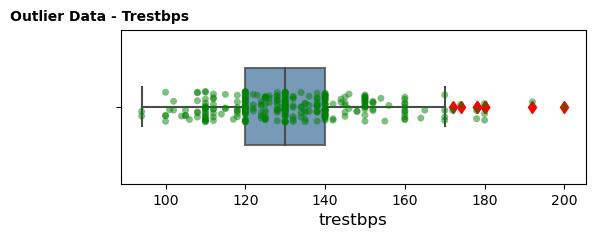

In [34]:
plt.style.use('default')

flierprops = dict(marker='d', markerfacecolor='r', markersize=6,
                  linestyle='none', markeredgecolor='r')


for i in enumerate(numeric_var[1:2]):
    
    title=i[1]
    fig, (ax1) = plt.subplots(1,1,figsize=(6,2))
    fig.suptitle('Outlier Data' + " - " + title[0].upper() + title[1:], fontsize=10, fontweight="bold", x=0.09)
    
    # = all
    sns.boxplot(x=i[1], data=dfe, width=0.5, color='steelblue',boxprops=dict(alpha=0.8), 
                      flierprops=flierprops, ax=ax1)
    sns.stripplot(x=i[1],data=dfe, jitter=True, alpha=0.5, color='green',ax=ax1)
    plt.setp(ax1.get_xticklabels(), fontsize=10)
    ax1.set_xlabel(i[1], fontsize=12)
    
plt.show()

Resting blood pressure statistical data.

In [35]:
# trestbps statistical info
pd.options.display.float_format = '{:.1f}'.format
trest = dfe['trestbps'].describe()
print(trest)

count   302.0
mean    131.6
std      17.6
min      94.0
25%     120.0
50%     130.0
75%     140.0
max     200.0
Name: trestbps, dtype: float64


Let us calculate Q1, Q3 and IQR:

In [36]:
#calculte Q1, Q3 and IQR
Q1 = dfe.trestbps.quantile(0.25)
Q3 = dfe.trestbps.quantile(0.75)
print("75% (3rd quantile value:) " + str(Q3))
print("25% (1st quantile value:) " + str(Q1))
print ("Median: " + str(dfe.trestbps.median()))
IQR = Q3 - Q1
print("Inner Quartile Range (IQR) = Q3-Q1 : " + str(IQR))

75% (3rd quantile value:) 140.0
25% (1st quantile value:) 120.0
Median: 130.0
Inner Quartile Range (IQR) = Q3-Q1 : 20.0


Calculate the upper and lower limits. Any value below the lower limit and any value above the upper limit
are outliers.

In [37]:
# Calculate the upper and lower limits  (any value below the lower limit and any value above the upper limit
# are outliers)

Lower_L = Q1 - 1.5*IQR
Upper_L = Q3 + 1.5*IQR

print("Lower Limit: " + str(Lower_L))

print("Upper Limit: " + str(Upper_L))

Lower Limit: 90.0
Upper Limit: 170.0


List of resting blood pressure outliers:

In [38]:
#Identify the outliers
trestbps_outliers = dfm.loc[(dfm['trestbps'] > Upper_L) | (dfm['trestbps'] < Lower_L)]

print(trestbps_outliers.to_string(index=False))

 age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
  52    1   2       172   199    1        1      162      0      0.5      2   0     3       1
  59    1   3       178   270    0        0      145      0      4.2      0   0     3       1
  64    0   0       180   325    0        1      154      1      0.0      2   0     2       1
  68    1   2       180   274    1        0      150      1      1.6      1   0     3       0
  56    0   0       200   288    1        0      133      1      4.0      0   2     3       0
  59    0   0       174   249    0        1      143      1      0.0      1   0     2       0
  54    1   1       192   283    0        0      195      0      0.0      2   1     3       0
  66    0   0       178   228    1        1      165      1      1.0      1   2     3       0
  55    0   0       180   327    0        2      117      1      3.4      1   0     2       0


Using boxplot_stats we can confirm the outliers data we calculated above:

In [39]:
#using boxplot_stats we can confirm the outlier data we calculated above 
trest_fliers = boxplot_stats(dfm.trestbps).pop(0)['fliers']
print(trest_fliers)

[172 178 180 180 200 174 192 178 180]


Now that we have isolated the outliers population for feature trestbps, let us analyze the outliers data and determine if there is any correlation between the resting blood pressure for these outliers and the incidence for CVD. 

We are particularly interested in the strength of association between having cvd and not having cvd (target variable, which is dichotomous) and the resting blood pressure (trestbps, which is continuous) for a patient. Given that we want to measure the correlation between a binary variable (target) and a continuous variable (trestbps) we will employ the point-biserial correlation test. 

First, we will plot the data to better assist in visualizing and interpreting our results of this test.  

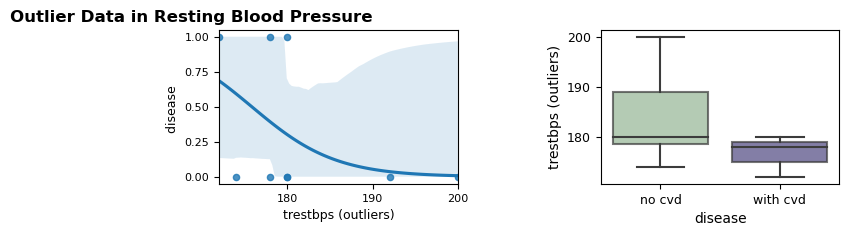

In [40]:
plt.style.use('default')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,2))
fig.suptitle('Outlier Data in Resting Blood Pressure', fontsize=12, fontweight="bold",x=0.09)

# = scatter
sns.regplot(x="trestbps", y="target",logistic = True, scatter_kws={"s": 20},data=trestbps_outliers, ax=ax1)
ax1.set_xlabel('trestbps (outliers)', fontsize=9)
ax1.set_ylabel('disease ',fontsize=9)
plt.setp(ax1.get_xticklabels(), fontsize=8)
plt.setp(ax1.get_yticklabels(), fontsize=8)

# = box
sns.boxplot(x=trestbps_outliers["target"], y=trestbps_outliers["trestbps"], palette=['darkseagreen','darkslateblue'],
            boxprops=dict(alpha=.7), ax=ax2)
ax2.set_xticklabels(["no cvd", "with cvd"], fontsize=9)
plt.setp(ax2.get_yticklabels(), fontsize=9)
ax2.set_xlabel('disease', fontsize=10)
ax2.set_ylabel('trestbps (outliers)',fontsize=10)

fig.subplots_adjust(wspace=0.6)
plt.show()

Referencing the scatter diagram from above, we see that there exists a negative slope between the two features. This indicates a negative relationship between resting blood pressure (outliers) and having or not having cvd.  In other words, the resting blood pressure tends to be lower for those with the disease (target value = 1), and tends to go up for those without the disease (target value = 0).  Since our target variable (cvd) is measured on a nominal level (0,1; where 0 indicates not having the disease and 1 indicates having the disease), a better way to display the data is with a box plot.

From the boxplot figure we see that the "with cvd" boxplot is comparatively shorter than that of the "no cvd" boxplot. This suggests that overall, resting blood pressures in this group are very close to each other. On the other hand, the "no cvd" box plot is comparatively taller. This suggests that patients resting blood pressures have greater variation within this group of outliers.  

Now that we have an understanding of the direction of our association between the two variables we can conduct the Point-Biserial Correlation Analysis.

In [41]:
from scipy.stats import pointbiserialr
coef, p  = pointbiserialr(trestbps_outliers.target, trestbps_outliers.trestbps)

alpha = 0.05
print(colored(("Point Biserial Correlation Test Results " + "(" +  "trestbps outliers & cvd" +")"+": "),'green',attrs=['bold']))
print("")
print('Point-Biserial correlation coefficient: %.3f' % coef)


if p > alpha:
    print('Data are uncorrelated. Fail to reject H0. p-value = ' + "{:.2e}".format(p))
else:
    print('Data are correlated. Reject H0. p-value = ' + "{:.2e}".format(p))

Point Biserial Correlation Test Results (trestbps outliers & cvd): 

Point-Biserial correlation coefficient: -0.413
Data are uncorrelated. Fail to reject H0. p-value = 2.69e-01


**Conclusion:** Since the p-value of this correlation is not less than 0.05, the correlation is not statistically significant. We fail to reject the null hypothesis.  In failing to reject the null hypothesis, we can conclude that there is not enough evidence to suggest a correlation between trestbps outliers and cvd. We cannot use outliers data in resting blood pressure to predict an outcome for heart disease.

###  Cholesterol

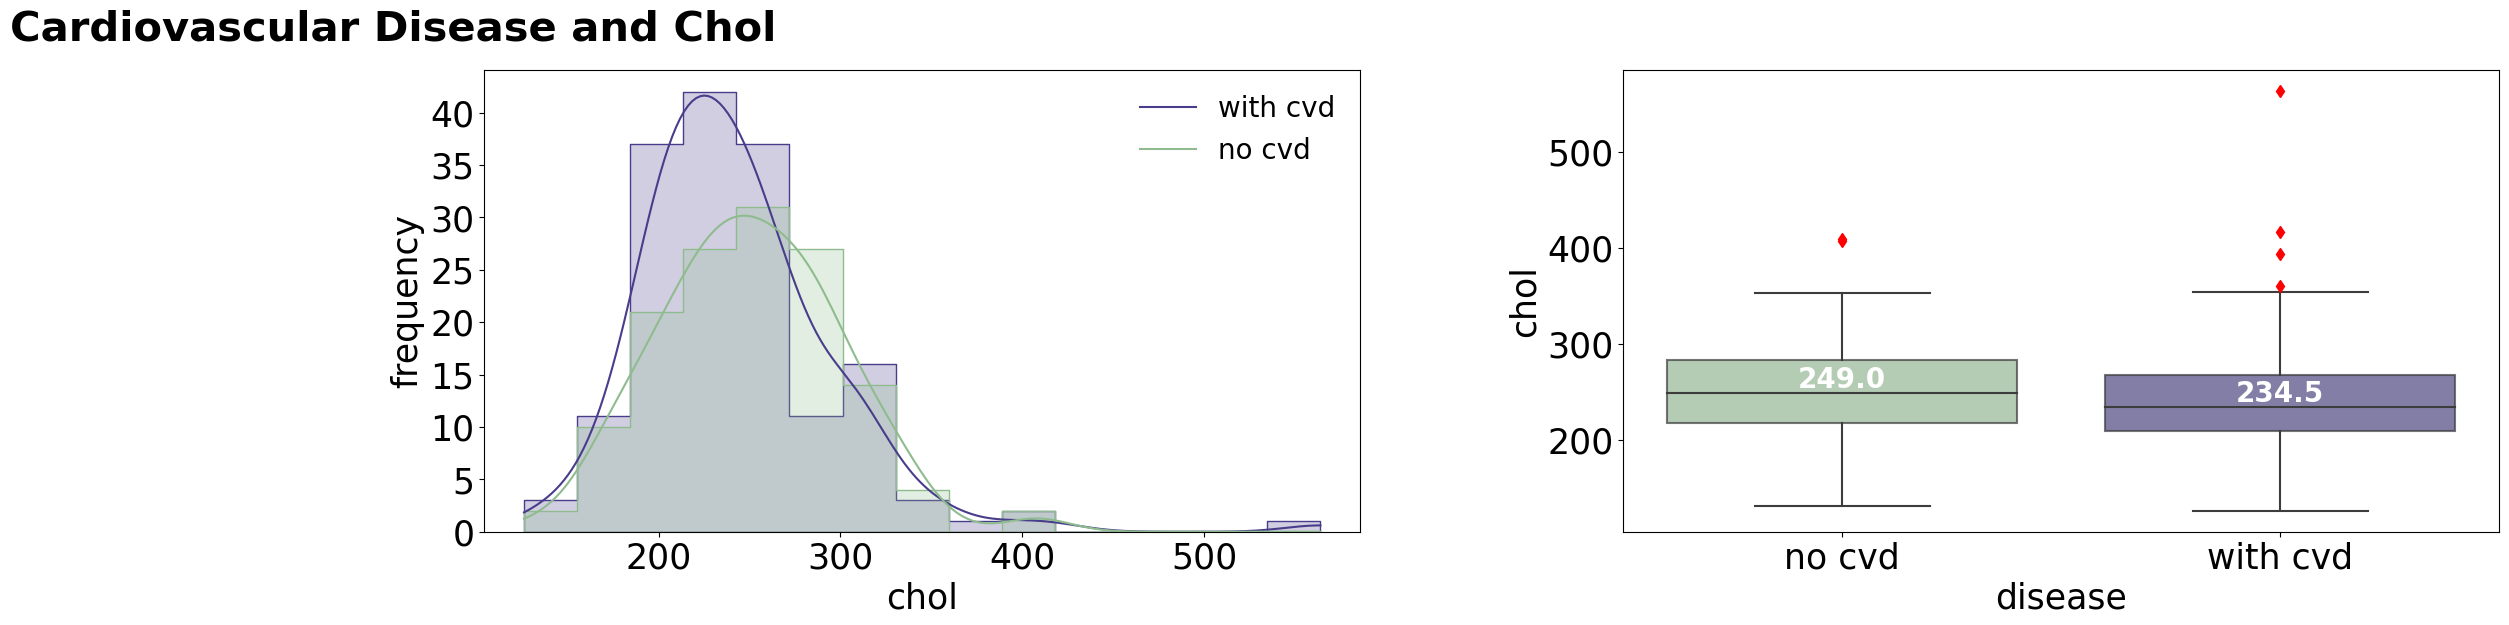

In [42]:
plt.style.use('default')
for i in enumerate(numeric_var[2:3]):

    title = i[1]    
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(26,6))
    fig.suptitle('Cardiovascular Disease and ' + title[0].upper() + title[1:], fontsize=30, fontweight="bold", x=0.09)
     
    # = disease histplot
    sns.histplot(data=dfm, x=i[1],hue='target',element='step',palette=['darkseagreen','darkslateblue'], kde=True,
                 bins=15,ax=ax1)
    plt.setp(ax1.get_xticklabels(), fontsize=25)
    plt.setp(ax1.get_yticklabels(), fontsize=25)
    ax1.set_xlabel(i[1], fontsize=25)
    ax1.set_ylabel('frequency',fontsize=25)
    ax1.legend(title='', labels=[ 'with cvd','no cvd'], frameon=False, fontsize=20)
    
     
    # = disease boxplot
    sns.boxplot(data=dfm, x=dfm.target, y=i[1], palette=['darkseagreen','darkslateblue'], orient='v',
                flierprops=flierprops, boxprops=dict(alpha=.7), ax=ax2)
    ax2.set_xticklabels(["no cvd", "with cvd"], fontsize=25)
    plt.setp(ax2.get_yticklabels(), fontsize=25)
    ax2.set_xlabel('disease', fontsize=25)
    ax2.set_ylabel(i[1], fontsize=25)
    
    medians = dfm.groupby(['target'])[i[1]].median()
    vertical_offset = dfm[i[1]].median() * 0.02 # offset from median for display
    for xtick in ax2.get_xticks():
        ax2.text(xtick,medians[xtick] + vertical_offset,medians[xtick],
                 horizontalalignment='center',fontsize=20,color='w',weight='bold')
        
fig.subplots_adjust(wspace=0.3)
plt.show()

In [43]:

for i in enumerate(numeric_var[2:3]):

    print(colored(("Measures of central tendency for feature - " + i[1] + ":"),'green',attrs=['bold']))
    print("")
    def my_agg(x):
        names = {
            'patients': x[i[1]].count().round(0),
            'min'   : x[i[1]].min(),
            'max'   : x[i[1]].max(),
            'mean'  : x[i[1]].mean(),
            'median': x[i[1]].median(),
            'std'   : x[i[1]].std(),
            'skew'  : x[i[1]].skew(),
            'Q1'    : x[i[1]].quantile(.25),
            'Q3'    : x[i[1]].quantile(.75)
        }
        
        return pd.Series(names, index=['patients','min', 'Q1','median','Q3','max', 'mean','std','skew'])

    print (dfe.groupby('target').apply(my_agg).round(2))
    print ("")

Measures of central tendency for feature - chol:

          patients   min    Q1  median    Q3   max  mean  std  skew
target                                                             
no cvd       138.0 131.0 217.2   249.0 283.0 409.0 251.1 49.5   0.3
with cvd     164.0 126.0 208.8   234.5 267.2 564.0 242.6 53.5   1.8



A common theory in the medical community is that high blood cholesterol, or cholesterol levels >240mg/dL is a major risk factor for heart disease. Interestingly, our data show that those with heart disease had a median cholesterol level **less** than 240mg/dL and those without heart disease had a median level **greater** than 240mg/dL. 

Emerging studies are taking a deeper dive into the study of and correlation between heart disease and cholesterol levels.  For example, an article published by Everyday Health suggests that "Total cholesterol, when considered alone, is a poor predictor of heart disease and heart attack. Studies show that total cholesterol levels among people who’ve had heart attacks are almost the same as those of people who haven’t, and that roughly half of heart attacks occur in people without high cholesterol."[2] 

Let us next use our dataset to measure the relationship between cholesterol levels and cvd.

In [44]:
coef, p  = pointbiserialr(dfm2.target, dfm2.chol)
alpha = 0.05
for i in enumerate(numeric_var[2:3]):
    print(colored(("Point Biserial Correlation Test Results " + "(" +  i[1] + " & cvd)"+": "),'green',attrs=['bold']))
    print("")
    print('Point-Biserial correlation coefficient: %.3f' % coef)

    if p > alpha:
        print('Data are uncorrelated. Fail to reject H0. p-value = ' + "{:.2e}".format(p))
    else:
        print('Data are correlated. Reject H0. p-value = ' + "{:.2e}".format(p))

Point Biserial Correlation Test Results (chol & cvd): 

Point-Biserial correlation coefficient: -0.106
Data are uncorrelated. Fail to reject H0. p-value = 7.61e-02


**chol:** Since the p-value of this correlation is not less than 0.05, the correlation test is not statistically significant. We fail to reject the null hypothesis.  In failing to reject the null hypothesis, we can conclude that there is not enough evidence to suggest a correlation between cholesterol blood levels and cvd. 

###  Excercise induced st - depression (oldpeak)

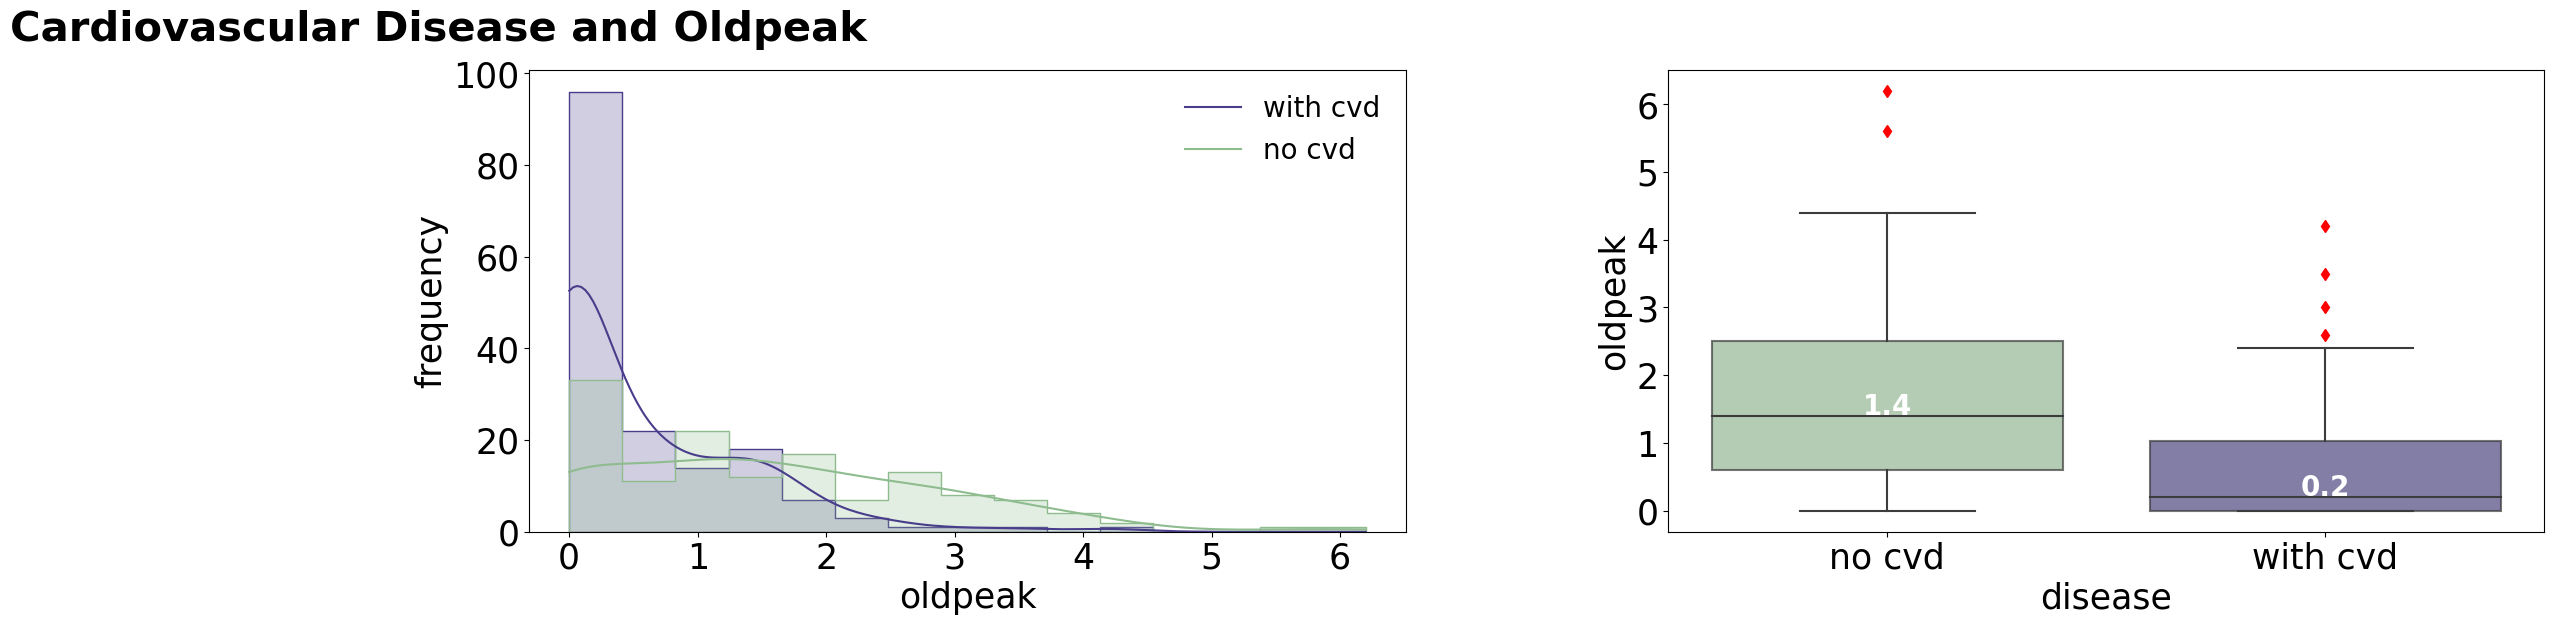

In [45]:

for i in enumerate(numeric_var[4:5]):

    title = i[1]    
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(26,6))
    fig.suptitle('Cardiovascular Disease and ' + title[0].upper() + title[1:], fontsize=30, fontweight="bold", x=0.09)
     
    # = disease histplot
    sns.histplot(data=dfm, x=i[1],hue='target',element='step',palette=['darkseagreen','darkslateblue'], kde=True,
                 bins=15,ax=ax1)
    plt.setp(ax1.get_xticklabels(), fontsize=25)
    plt.setp(ax1.get_yticklabels(), fontsize=25)
    ax1.set_xlabel(i[1], fontsize=25)
    ax1.set_ylabel('frequency',fontsize=25)
    ax1.legend(title='', labels=[ 'with cvd','no cvd'], frameon=False, fontsize=20)
    
     
    # = disease boxplot
    sns.boxplot(data=dfm, x=dfm.target, y=i[1], palette=['darkseagreen','darkslateblue'], orient='v',
                flierprops=flierprops, boxprops=dict(alpha=.7), ax=ax2)
    ax2.set_xticklabels(["no cvd", "with cvd"], fontsize=25)
    plt.setp(ax2.get_yticklabels(), fontsize=25)
    ax2.set_xlabel('disease', fontsize=25)
    ax2.set_ylabel(i[1], fontsize=25)
    
    medians = dfm.groupby(['target'])[i[1]].median()
    vertical_offset = dfm[i[1]].median() * 0.02 # offset from median for display
    for xtick in ax2.get_xticks():
        ax2.text(xtick,medians[xtick] + vertical_offset,medians[xtick],
                 horizontalalignment='center',fontsize=20,color='w',weight='bold')
        
fig.subplots_adjust(wspace=0.3)
plt.show()

In [46]:

for i in enumerate(numeric_var[4:5]):

    print(colored(("Measures of central tendency for feature - " + i[1] + ":"),'green',attrs=['bold']))
    print("")
    def my_agg(x):
        names = {
            'patients': x[i[1]].count().round(0),
            'min'   : x[i[1]].min(),
            'max'   : x[i[1]].max(),
            'mean'  : x[i[1]].mean(),
            'median': x[i[1]].median(),
            'std'   : x[i[1]].std(),
            'skew'  : x[i[1]].skew(),
            'Q1'    : x[i[1]].quantile(.25),
            'Q3'    : x[i[1]].quantile(.75)
        }
        
        return pd.Series(names, index=['patients','min', 'Q1','median','Q3','max', 'mean','std','skew'])

    print (dfe.groupby('target').apply(my_agg).round(2))
    print ("") 

Measures of central tendency for feature - oldpeak:

          patients  min  Q1  median  Q3  max  mean  std  skew
target                                                       
no cvd       138.0  0.0 0.6     1.4 2.5  6.2   1.6  1.3   0.7
with cvd     164.0  0.0 0.0     0.2 1.0  4.2   0.6  0.8   1.6



In [47]:
coef, p  = pointbiserialr(dfm2.target, dfm2.oldpeak)
alpha = 0.05
for i in enumerate(numeric_var[4:5]):
    print(colored(("Point Biserial Correlation Test Results " + "(" +  i[1] + " & cvd)"+": "),'green',attrs=['bold']))
    print("")
    print('Point-Biserial correlation coefficient: %.3f' % coef)

    if p > alpha:
        print('Data are uncorrelated. Fail to reject H0. p-value = ' + "{:.2e}".format(p))
    else:
        print('Data are correlated. Reject H0. p-value = ' + "{:.2e}".format(p))

Point Biserial Correlation Test Results (oldpeak & cvd): 

Point-Biserial correlation coefficient: -0.434
Data are correlated. Reject H0. p-value = 1.96e-14


**oldpeak:** For p-value less than 0.05, we reject the null hypothesis that no correlation exists between oldpeak and whether or not a patient has cvd.  The correlation test is statistically significant. In rejecting the null hypothesis, we conclude that there is a relationship between oldpeak and cvd.  Our correlation coefficient describes the weight of the relationship as -0.434. 

###  Maximum heart rate achieved (thalach)

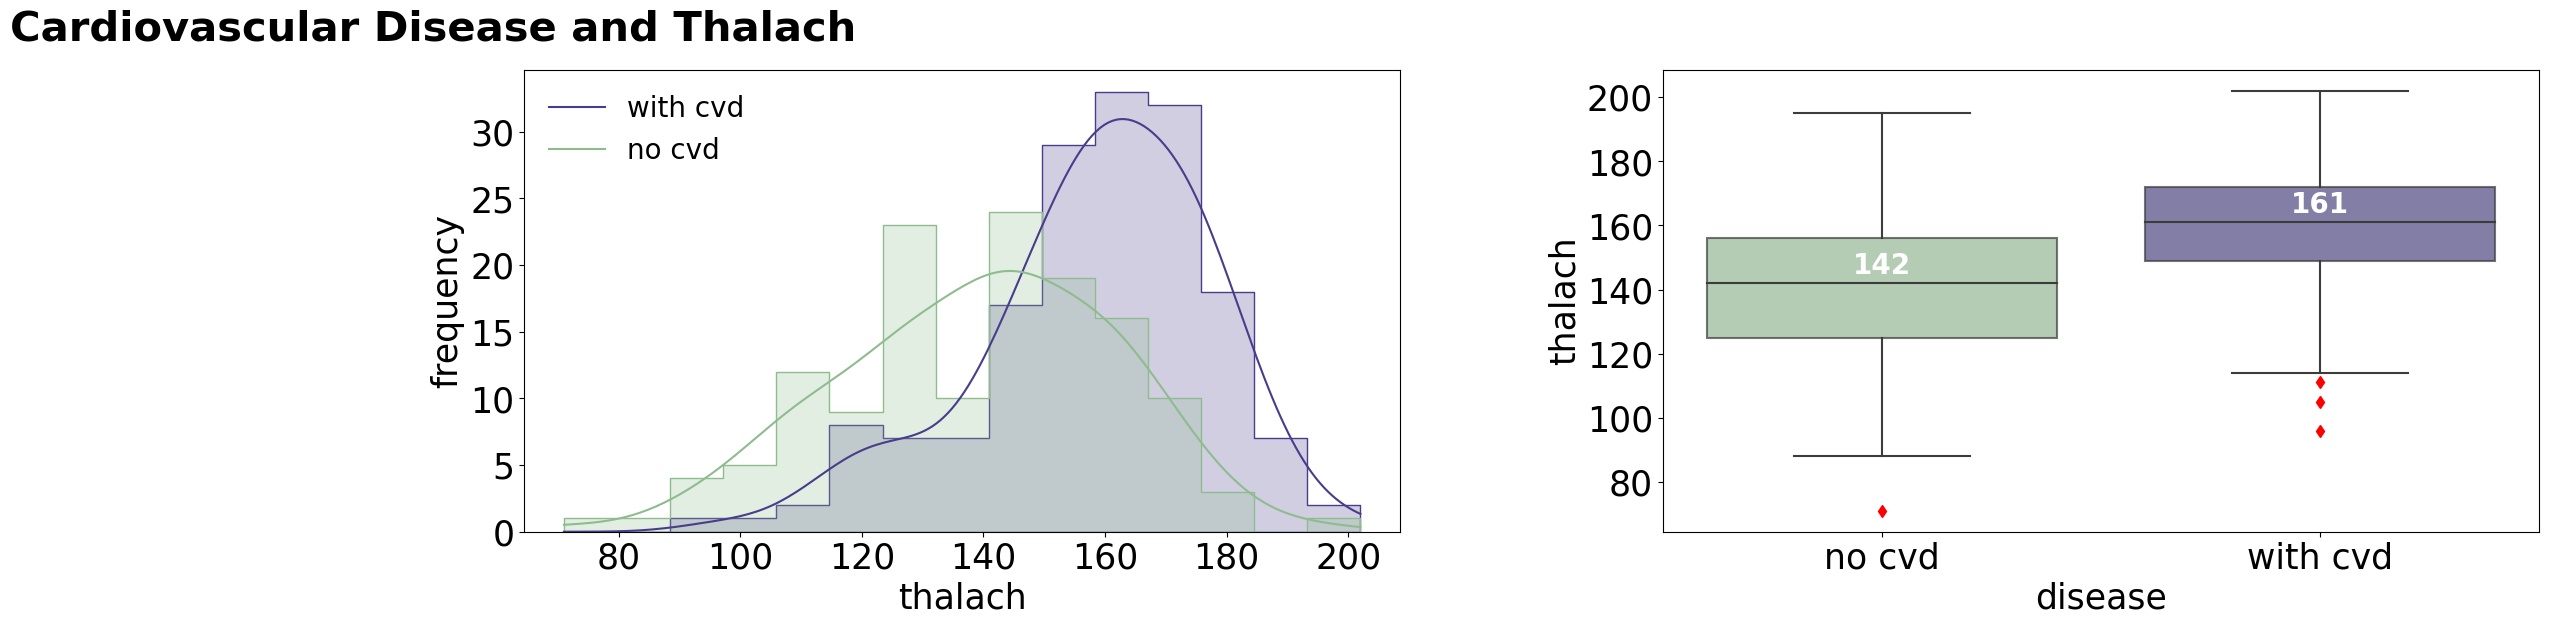

In [48]:

for i in enumerate(numeric_var[3:4]):

    title = i[1]    
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(26,6))
    fig.suptitle('Cardiovascular Disease and ' + title[0].upper() + title[1:], fontsize=30, fontweight="bold", x=0.09)
     
    # = disease histplot
    sns.histplot(data=dfm, x=i[1],hue='target',element='step',palette=['darkseagreen','darkslateblue'], kde=True,
                 bins=15,ax=ax1)
    plt.setp(ax1.get_xticklabels(), fontsize=25)
    plt.setp(ax1.get_yticklabels(), fontsize=25)
    ax1.set_xlabel(i[1], fontsize=25)
    ax1.set_ylabel('frequency',fontsize=25)
    ax1.legend(title='', labels=[ 'with cvd','no cvd'], frameon=False, fontsize=20)
    
     
    # = disease boxplot
    sns.boxplot(data=dfm, x=dfm.target, y=i[1], palette=['darkseagreen','darkslateblue'], orient='v',
                flierprops=flierprops, boxprops=dict(alpha=.7), ax=ax2)
    ax2.set_xticklabels(["no cvd", "with cvd"], fontsize=25)
    plt.setp(ax2.get_yticklabels(), fontsize=25)
    ax2.set_xlabel('disease', fontsize=25)
    ax2.set_ylabel(i[1], fontsize=25)
    
    medians = dfm.groupby(['target'])[i[1]].median()
    vertical_offset = dfm[i[1]].median() * 0.02 # offset from median for display
    for xtick in ax2.get_xticks():
        ax2.text(xtick,medians[xtick] + vertical_offset,medians[xtick],
                 horizontalalignment='center',fontsize=20,color='w',weight='bold')
        
fig.subplots_adjust(wspace=0.3)
plt.show()

In [49]:

for i in enumerate(numeric_var[3:4]):

    print(colored(("Measures of central tendency for feature - " + i[1] + ":"),'green',attrs=['bold']))
    print("")
    def my_agg(x):
        names = {
            'patients': x[i[1]].count().round(0),
            'min'   : x[i[1]].min(),
            'max'   : x[i[1]].max(),
            'mean'  : x[i[1]].mean(),
            'median': x[i[1]].median(),
            'std'   : x[i[1]].std(),
            'skew'  : x[i[1]].skew(),
            'Q1'    : x[i[1]].quantile(.25),
            'Q3'    : x[i[1]].quantile(.75)
        }
        
        return pd.Series(names, index=['patients','min', 'Q1','median','Q3','max', 'mean','std','skew'])

    print (dfe.groupby('target').apply(my_agg).round(2))
    print ("")

Measures of central tendency for feature - thalach:

          patients  min    Q1  median    Q3   max  mean  std  skew
target                                                            
no cvd       138.0 71.0 125.0   142.0 156.0 195.0 139.1 22.6  -0.3
with cvd     164.0 96.0 148.8   161.0 172.0 202.0 158.4 19.2  -0.7



In [50]:
coef, p  = pointbiserialr(dfm2.target, dfm2.thalach)
alpha = 0.05
for i in enumerate(numeric_var[3:4]):
    print(colored(("Point Biserial Correlation Test Results " + "(" +  i[1] + " & cvd)"+": "),'green',attrs=['bold']))
    print("")
    print('Point-Biserial correlation coefficient: %.3f' % coef)

    if p > alpha:
        print('Data are uncorrelated. Fail to reject H0. p-value = ' + "{:.2e}".format(p))
    else:
        print('Data are correlated. Reject H0. p-value = ' + "{:.2e}".format(p)) 

Point Biserial Correlation Test Results (thalach & cvd): 

Point-Biserial correlation coefficient: 0.423
Data are correlated. Reject H0. p-value = 1.10e-13


The feature thalach represents the maximum heart rate achieved by the patient. Though we can observe that the thalach for both our positively and negatively diseased patients can overlap, those with the disease tend to have higher maximum heart rates. The median heart rate achieved for the "no cvd" cohorts was 142 compared to those "with cvd" cohorts, which have a median rate of 161; a nearly 19 point difference.

**thalach:** For p-value less than 0.05, we reject the null hypothesis that no correlation exists between thalach and whether or not a patient has cvd.  In rejecting the null hypothesis, we conclude that there is a relationship between thalach and cvd.  Our correlation coefficient describes the weight of the relationship as 0.423.

## Categorical data

**Relationship of CVD (response variable) to the categorical predictor variables**

Let us study the distribution of and relationship between the predictor (independent) categorical variables relative to the response (dependent) variable for CVD.  To assign a relationship between our categorical attributes and the response target variable we will employ the Chi-Square Test.

### Gender

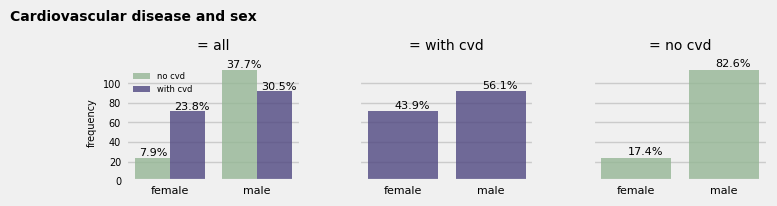

In [51]:
plt.style.use('fivethirtyeight')

for i in enumerate(category_var[0:1]):

    title=i[1]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(7,2), sharey=True)
    fig.suptitle('Cardiovascular disease and ' +  i[1] , fontsize=10, fontweight="bold", x=0.08)
    
    # = disease count plot
    sns.countplot(data=dfe, x=i[1],hue=dfe.target,palette=['darkseagreen', 'darkslateblue'], alpha=0.8, ax=ax1)
    ax1.set_title('= all', fontsize=10, pad=10)
    ax1.tick_params(axis='x', labelsize=8)
    ax1.tick_params(axis='y', labelsize=7)
    ax1.set_xlabel("",fontsize = 9)
    ax1.set_ylabel("frequency",fontsize = 7)
    ax1.legend(title='',frameon=False, fontsize=6,loc=2)
    totals = []
    for p in ax1.patches:
        totals.append(p.get_height())
        total = sum(totals)
    for p in ax1.patches:
        ax1.text(p.get_x()+.05, p.get_height()+1.5, \
                str(round((p.get_height()/total)*100, 1))+'%', fontsize=8,color='black')
        
        
    # = with disease count plot
    sns.countplot(data=wi_cvde, x=i[1], alpha=0.8, palette=['darkslateblue'], ax=ax2) 
    ax2.set_title('= with cvd', fontsize=10, pad=10)
    ax2.tick_params(axis='x', labelsize=8)
    #ax2.tick_params(axis='y', labelsize=9)
    ax2.set_xlabel("",fontsize = 9)
    ax2.set_ylabel("",fontsize = 6)
    totals2 = []
    for p in ax2.patches:
        totals2.append(p.get_height())
        total2 = sum(totals2)
    for p in ax2.patches:
        ax2.text(p.get_x()+0.3, p.get_height()+2.5, \
                str(round((p.get_height()/total2)*100, 1))+'%', fontsize=8,color='black')
    
  # = no disease count plot
    sns.countplot(data=no_cvde, x=i[1], alpha=0.8, palette=['darkseagreen'], ax=ax3) 
    ax3.set_title('= no cvd', fontsize=10, pad=10)
    ax3.tick_params(axis='x', labelsize=8)
    #ax3.tick_params(axis='y', labelsize=7)
    ax3.set_xlabel("",fontsize = 9)
    ax3.set_ylabel("",fontsize = 6)
    totals3 = []
    for p in ax3.patches:
        totals3.append(p.get_height())
        total3 = sum(totals3)
    for p in ax3.patches:
        ax3.text(p.get_x()+0.3, p.get_height()+2.5, \
                str(round((p.get_height()/total3)*100, 1))+'%', fontsize=8,color='black')   

fig.tight_layout(pad=0.5, w_pad=3.0)
plt.show()

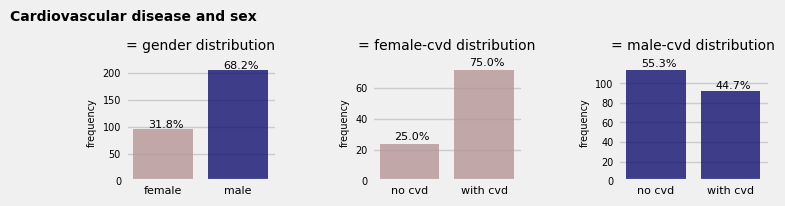

In [52]:
#plt.style.use('default')

for i in enumerate(category_var[0:1]):

    title=i[1]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(7,2), sharey=False)
    fig.suptitle('Cardiovascular disease and ' +  i[1] , fontsize=10, fontweight="bold", x=0.08)
    
    # = disease count plot
    sns.countplot(data=dfe,x=i[1],palette=['rosybrown', 'navy'], alpha=0.8, ax=ax1)
    sns.despine()
    ax1.set_title('= gender distribution', fontsize=10, pad=10)
    ax1.tick_params(axis='x', labelsize=8)
    ax1.tick_params(axis='y', labelsize=7)
    ax1.set_xlabel("",fontsize = 9)
    ax1.set_ylabel("frequency",fontsize = 7)
    totals = []
    for p in ax1.patches:
        totals.append(p.get_height())
        total = sum(totals)
    for p in ax1.patches:
        ax1.text(p.get_x()+0.2, p.get_height()+2.5, \
                str(round((p.get_height()/total)*100, 1))+'%', fontsize=8,color='black')
     
    # = disease count plot
    sns.countplot(data=dfe.loc[(dfe['sex']=='female')],x='target', palette=['rosybrown'], 
                  alpha=0.8, ax=ax2)
    sns.despine()
    ax2.set_title('= female-cvd distribution', fontsize=10,pad=10)
    ax2.tick_params(axis='x', labelsize=8)
    ax2.tick_params(axis='y', labelsize=7)
    ax2.set_xlabel("",fontsize = 9)
    ax2.set_ylabel("frequency",fontsize = 7)
    totals = []
    for p in ax2.patches:
        totals.append(p.get_height())
        total = sum(totals)
    for p in ax2.patches:
        ax2.text(p.get_x()+0.2, p.get_height()+2.5, \
                str(round((p.get_height()/total)*100, 1))+'%', fontsize=8,color='black')    
        
     
    # = disease count plot
    sns.countplot(data=dfe.loc[(dfe['sex']=='male')],x='target', palette=['navy'], 
                  alpha=0.8, ax=ax3)
    sns.despine()
    ax3.set_title('= male-cvd distribution', fontsize=10, pad=10)
    ax3.tick_params(axis='x', labelsize=8)
    ax3.tick_params(axis='y', labelsize=7)
    ax3.set_xlabel("",fontsize = 9)
    ax3.set_ylabel("frequency",fontsize = 7)
    totals = []
    for p in ax3.patches:
        totals.append(p.get_height())
        total = sum(totals)
    for p in ax3.patches:
        ax3.text(p.get_x()+0.2, p.get_height()+2.5, \
                str(round((p.get_height()/total)*100, 1))+'%', fontsize=8,color='black') 
        
fig.tight_layout(pad=0.5, w_pad=3.0)
plt.show()

In [53]:
y=dfe['target'].count()

for i in enumerate(category_var[0:1]):

    print(colored(("Summary Statistics feature - " + i[1] + ":"),'green',attrs=['bold']))
    print("")
    def my_agg(x):
        names = {
            'patients'    : x[i[1]].count(),
            'percent_pts'    : (x[i[1]].count()/y)*100,
            'mean_age'    : x['age'].mean(),
            'mean_oldpeak': x['oldpeak'].mean(),
            'mean_chol'   : x['chol'].mean(),
            'mean_thalach': x['thalach'].mean(),
            'mean_trestbps': x['trestbps'].mean()
        }
        
        return pd.Series(names, index=['patients','percent_pts','mean_age','mean_oldpeak','mean_chol','mean_thalach',
                                      'mean_trestbps'])

    gender_stats = dfe.groupby(['target',i[1]]).apply(my_agg).round(2)
    print(np.transpose(gender_stats))

Summary Statistics feature - sex:

target        no cvd       with cvd      
sex           female  male   female  male
patients        24.0 114.0     72.0  92.0
percent_pts      8.0  37.8     23.8  30.5
mean_age        59.0  56.1     54.6  51.0
mean_oldpeak     1.8   1.5      0.6   0.6
mean_chol      275.0 246.1    256.8 231.6
mean_thalach   142.4 138.4    154.0 161.8
mean_trestbps  146.1 131.9    128.7 129.7


**gender:** The gender distribution of the data is skewed in favor of the male population. The data makeup is ~68% male and 32% female.  Though we have more males than females with the disease (a 56%,44% split, respectively), we do see that three out of every four females has the disease.  The distribution of the population with and without cvd is more balanced for the male population with ~55% of males not having cvd, and ~45% having cvd. 

The mean cholesterol level for those with the disease suggests a variation when studying both genders. The mean cholesterol level for females with the disease is 256 and the mean cholesterol level for males with the disease is 231 (a 25 point difference). 

The mean age result indicates that males with the disease were slightly younger than females with the disease.  The mean age for females with the disease is 54.6, while for males it is 51.0. The mean resting blood pressure (trestbps) for females without the disease registered at 146.1, which is ~15 points higher than males without the disease. The difference was even greater (up to 18 points higher) between females without the disease and those females with the disease. 

**Testing the relationship between gender and incidence of cvd**

Using the Chi-Squared test we take the null hypothesis (H0) to assume the two variables are independent.  The alternate hypothesis (H1) assumes the two variables are dependent. 

**Interpretation of results:**

If test statistic >= critical value, the result is significant and we reject null hypothesis (H0). They are dependent.

If test statistic < critical value, the result is not significant and we fail to reject null hypothesis (H0). They are independent.

In [54]:
contingency_sex = pd.crosstab(dfe['sex'], dfe['target'])
print("Contingency Table:")
print(contingency_sex)

Contingency Table:
target  no cvd  with cvd
sex                     
female      24        72
male       114        92


In [55]:
chi, pval, dof, exp = chi2_contingency(contingency_sex)
for i in enumerate(category_var[0:1]):
    print(colored(("Chi-Squared Test Results " + "(" +  i[1] + " & cvd)"+": "),'green',attrs=['bold']))
    print("")
    print('p-value is: ', pval)
    significance = 0.05
    p = 1 - significance
    critical_value = chi2.ppf(p, dof)
    print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
    if chi > critical_value:
        print("""At %.2f level of significance, we reject the null hypotheses. They are not independent.""" % (significance))
    else:
        print("""At %.2f level of significance, we accept the null hypotheses. They are independent.""" % (significance))

Chi-Squared Test Results (sex & cvd): 

p-value is:  1.5508552054949547e-06
chi=23.083879, critical value=3.841459

At 0.05 level of significance, we reject the null hypotheses. They are not independent.


### ST segment/heart rate slope

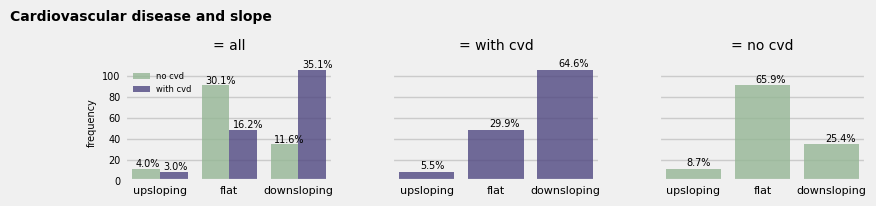

In [56]:
plt.style.use('fivethirtyeight')

for i in enumerate(category_var[5:6]):

    title=i[1]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(8,2), sharey=True)
    fig.suptitle('Cardiovascular disease and ' +  i[1] , fontsize=10, fontweight="bold", x=0.08)
    
    # = disease count plot
    sns.countplot(data=dfe, x=i[1],hue=dfe.target,palette=['darkseagreen', 'darkslateblue'], alpha=0.8, ax=ax1)
    ax1.set_title('= all', fontsize=10, pad=10)
    ax1.tick_params(axis='x', labelsize=8)
    ax1.tick_params(axis='y', labelsize=7)
    ax1.set_xlabel("",fontsize = 9)
    ax1.set_ylabel("frequency",fontsize = 7)
    #ax1.set_ylim(0,120)
    ax1.legend(title='',frameon=False, fontsize=6,loc=2)
    totals = []
    for p in ax1.patches:
        totals.append(p.get_height())
        total = sum(totals)
    for p in ax1.patches:
        ax1.text(p.get_x()+.05, p.get_height()+1.5, \
                str(round((p.get_height()/total)*100, 1))+'%', fontsize=7,color='black')
        
        
    # = with disease count plot
    sns.countplot(data=wi_cvde, x=i[1], alpha=0.8, palette=['darkslateblue'], ax=ax2) 
    ax2.set_title('= with cvd', fontsize=10, pad=10)
    ax2.tick_params(axis='x', labelsize=8)
    ax2.tick_params(axis='y', labelsize=9)
    ax2.set_xlabel("",fontsize = 9)
    ax2.set_ylabel("",fontsize = 6)
    totals2 = []
    for p in ax2.patches:
        totals2.append(p.get_height())
        total2 = sum(totals2)
    for p in ax2.patches:
        ax2.text(p.get_x()+0.3, p.get_height()+2.5, \
                str(round((p.get_height()/total2)*100, 1))+'%', fontsize=7,color='black')
    
  # = no disease count plot
    sns.countplot(data=no_cvde, x=i[1], alpha=0.8, palette=['darkseagreen'], ax=ax3) 
    ax3.set_title('= no cvd', fontsize=10, pad=10)
    ax3.tick_params(axis='x', labelsize=8)
    ax3.tick_params(axis='y', labelsize=7)
    ax3.set_xlabel("",fontsize = 9)
    ax3.set_ylabel("",fontsize = 6)
    totals3 = []
    for p in ax3.patches:
        totals3.append(p.get_height())
        total3 = sum(totals3)
    for p in ax3.patches:
        ax3.text(p.get_x()+0.3, p.get_height()+2.5, \
                str(round((p.get_height()/total3)*100, 1))+'%', fontsize=7,color='black')   

fig.tight_layout(pad=0.5, w_pad=3.0)
plt.show()

In [57]:
y=dfe['target'].count()

for i in enumerate(category_var[5:6]):

    print(colored(("Summary Statistics feature - " + i[1] + ":"),'green',attrs=['bold']))
    print("")
    def my_agg(x):
        names = {
            'patients'    : x[i[1]].count(),
            '%_of_pts'    : (x[i[1]].count()/y)*100,
            'mean_age'    : x['age'].mean(),
            'mean_oldpeak': x['oldpeak'].mean(),
            'mean_chol'   : x['chol'].mean(),
            'mean_thalach': x['thalach'].mean(),
            'mean_trestbps': x['trestbps'].mean()
        }
        
        return pd.Series(names, index=['patients','%_of_pts','mean_age','mean_oldpeak','mean_chol','mean_thalach',
                                      'mean_trestbps'])
    slope_stats = dfe.groupby(['target',i[1]]).apply(my_agg).round(2)
    print(np.transpose(slope_stats))

Summary Statistics feature - slope:

target           no cvd                    with cvd                  
slope         upsloping  flat downsloping upsloping  flat downsloping
patients           12.0  91.0        35.0       9.0  49.0       106.0
%_of_pts            4.0  30.1        11.6       3.0  16.2        35.1
mean_age           57.2  57.0        55.3      52.9  54.4        51.7
mean_oldpeak        3.4   1.7         0.6       1.8   0.9         0.3
mean_chol         240.4 253.8       247.8     234.0 240.5       244.4
mean_thalach      135.0 133.5       155.1     158.1 150.1       162.2
mean_trestbps     140.8 135.1       130.3     137.8 126.5       129.8


**slope**:
Approximately 70% of the cohorts with cvd had a depressed (either upsloping or downsloping) ST segment indicating possible abnormality.   

In [58]:
contingency_slope = pd.crosstab(dfe['slope'], dfe['target'])
print("Contingency Table:")
print(contingency_slope)

Contingency Table:
target       no cvd  with cvd
slope                        
upsloping        12         9
flat             91        49
downsloping      35       106


In [59]:
chi, pval, dof, exp = chi2_contingency(contingency_slope)
for i in enumerate(category_var[5:6]):
    print(colored(("Chi-Squared Test Results " + "(" +  i[1] + " & cvd)"+": "),'green',attrs=['bold']))
    print("")
    print('p-value is: ', pval)
    significance = 0.05
    p = 1 - significance
    critical_value = chi2.ppf(p, dof)
    print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
    if chi > critical_value:
        print("""At %.2f level of significance, we reject the null hypotheses. They are not independent.""" % (significance))
    else:
        print("""At %.2f level of significance, we accept the null hypotheses. They are independent.""" % (significance))

Chi-Squared Test Results (slope & cvd): 

p-value is:  6.577782760917924e-11
chi=46.889477, critical value=5.991465

At 0.05 level of significance, we reject the null hypotheses. They are not independent.


### Thal

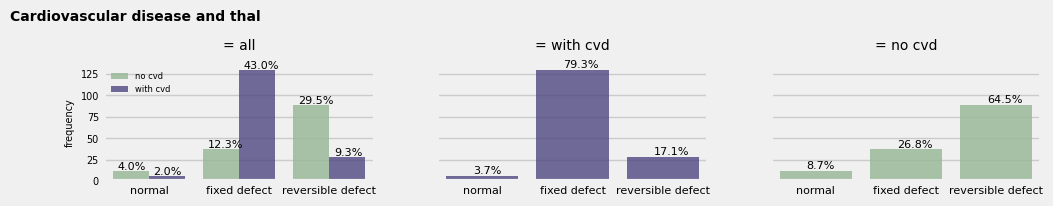

In [60]:
plt.style.use('fivethirtyeight')

for i in enumerate(category_var[7:8]):

    title=i[1]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,2), sharey=True)
    fig.suptitle('Cardiovascular disease and ' +  i[1] , fontsize=10, fontweight="bold", x=0.08)
    
    # = disease count plot
    sns.countplot(data=dfe, x=i[1],hue=dfe.target,palette=['darkseagreen', 'darkslateblue'], alpha=0.8, ax=ax1)
    ax1.set_title('= all', fontsize=10, pad=10)
    ax1.tick_params(axis='x', labelsize=8)
    ax1.tick_params(axis='y', labelsize=7)
    ax1.set_xlabel("",fontsize = 9)
    ax1.set_ylabel("frequency",fontsize = 7)
    ax1.legend(title='',frameon=False, fontsize=6,loc=2)
    totals = []
    for p in ax1.patches:
        totals.append(p.get_height())
        total = sum(totals)
    for p in ax1.patches:
        ax1.text(p.get_x()+.05, p.get_height()+1.5, \
                str(round((p.get_height()/total)*100, 1))+'%', fontsize=8,color='black')     
        
    # = with disease count plot
    sns.countplot(data=wi_cvde, x=i[1], alpha=0.8, palette=['darkslateblue'], ax=ax2) 
    ax2.set_title('= with cvd', fontsize=10, pad=10)
    ax2.tick_params(axis='x', labelsize=8)
    ax2.tick_params(axis='y', labelsize=9)
    ax2.set_xlabel("",fontsize = 9)
    ax2.set_ylabel("",fontsize = 6)
    totals2 = []
    for p in ax2.patches:
        totals2.append(p.get_height())
        total2 = sum(totals2)
    for p in ax2.patches:
        ax2.text(p.get_x()+0.3, p.get_height()+2.5, \
                str(round((p.get_height()/total2)*100, 1))+'%', fontsize=8,color='black')
    
  # = no disease count plot
    sns.countplot(data=no_cvde, x=i[1], alpha=0.8, palette=['darkseagreen'], ax=ax3) 
    ax3.set_title('= no cvd', fontsize=10, pad=10)
    ax3.tick_params(axis='x', labelsize=8)
    ax3.tick_params(axis='y', labelsize=7)
    ax3.set_xlabel("",fontsize = 9)
    ax3.set_ylabel("",fontsize = 6)
    totals3 = []
    for p in ax3.patches:
        totals3.append(p.get_height())
        total3 = sum(totals3)
    for p in ax3.patches:
        ax3.text(p.get_x()+0.3, p.get_height()+2.5, \
                str(round((p.get_height()/total3)*100, 1))+'%', fontsize=8,color='black')   

fig.tight_layout(pad=0.5, w_pad=3.0)
plt.show()

In [61]:
y=dfe['target'].count()

for i in enumerate(category_var[7:8]):

#    print(colored(("Summary Statistics feature - " + i[1] + ":"),'green',attrs=['bold']))
    print("")
    def my_agg(x):
        names = {
            'patients'    : x[i[1]].count(),
            '%_of_pts'    : (x[i[1]].count()/y)*100,
            'mean_age'    : x['age'].mean(),
            'mean_oldpeak': x['oldpeak'].mean(),
            'mean_chol'   : x['chol'].mean(),
            'mean_thalach': x['thalach'].mean(),
            'mean_trestbps': x['trestbps'].mean()
        }
        
        return pd.Series(names, index=['patients','%_of_pts','mean_age','mean_oldpeak','mean_chol','mean_thalach',
                                      'mean_trestbps'])
    thal_stats = dfe.groupby(['target',i[1]]).apply(my_agg).round(2)

In [62]:
for i in enumerate(category_var[7:8]):

    print(colored(("Summary Statistics feature - " + i[1] + ":"),'green',attrs=['bold']))

thal_stats.style \
          .background_gradient(cmap='Blues', axis=0) \
          .format('{0:,.1f}')

Summary Statistics feature - thal:


**thal**:
An overwhelming majority (nearly 80%) of the cohorts with cvd were documented to have a fixed defect for feature thal.  A majority of the patients without cvd (~65%) were documented with a condition of reversible defect for thal. Regardless of feature thal indications, the mean cholesterol levels remained **higher** for those **without cvd** than those with cvd. Looking at both cohorts (with and without cvd), and those with thal = fixed defect, we can see that the mean maximum heart rate achieved (thalach) is significantly higher for those with cvd than those without cvd. The mean thalach for those with cvd and fixed defect is 159.6, while those without cvd and a fixed defect measured a thalach of 140.8 (a nearly 19 point difference).  

In [63]:
contingency_thal = pd.crosstab(dfe['thal'], dfe['target'])
print("Contingency Table:")
print(contingency_thal)

Contingency Table:
target             no cvd  with cvd
thal                               
normal                 12         6
fixed defect           37       130
reversible defect      89        28


In [64]:
chi, pval, dof, exp = chi2_contingency(contingency_thal)
for i in enumerate(category_var[7:8]):
    print(colored(("Chi-Squared Test Results " + "(" +  i[1] + " & cvd)"+": "),'green',attrs=['bold']))
    print("")
    print('p-value is: ', pval)
    significance = 0.05
    p = 1 - significance
    critical_value = chi2.ppf(p, dof)
    print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
    if chi > critical_value:
        print("""At %.2f level of significance, we reject the null hypotheses. They are not independent.""" % (significance))
    else:
        print("""At %.2f level of significance, we accept the null hypotheses. They are independent.""" % (significance))

Chi-Squared Test Results (thal & cvd): 

p-value is:  5.8135009856856e-19
chi=83.977868, critical value=5.991465

At 0.05 level of significance, we reject the null hypotheses. They are not independent.


### Fasting blood sugar (fbs)

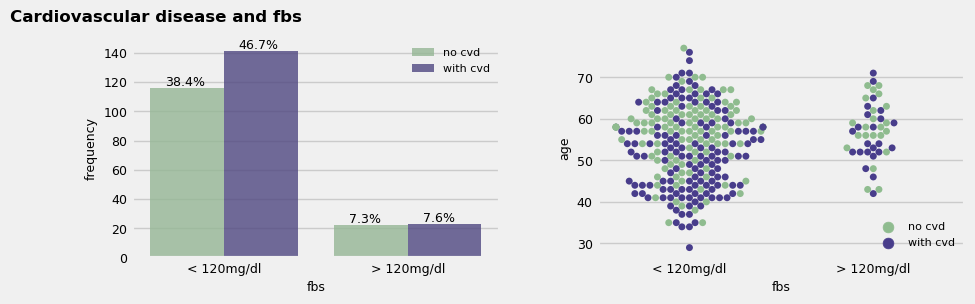

In [65]:
plt.style.use('fivethirtyeight')

for i in enumerate(category_var[2:3]):

    title=i[1]
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(9,3))
    fig.suptitle('Cardiovascular disease and ' +  i[1], fontsize=12, fontweight="bold", x=0.09)

    # = disease count plot
    sns.countplot(data=dfe, x=i[1],hue=dfe.target,palette=['darkseagreen', 'darkslateblue'], alpha=0.8, ax=ax1) 
    ax1.tick_params(axis='x', labelsize=9)
    ax1.tick_params(axis='y', labelsize=9)
    ax1.set_xlabel(i[1],fontsize = 9)
    ax1.set_ylabel("frequency",fontsize = 9)
    ax1.set_ylim(0,150)
    ax1.legend(title='',frameon=False, fontsize=8)
    totals = []
    for p in ax1.patches:
        totals.append(p.get_height())
        total = sum(totals)
    for p in ax1.patches:
        ax1.text(p.get_x()+.08, p.get_height()+1.5, \
                str(round((p.get_height()/total)*100, 1))+'%', fontsize=9,color='black')
    
    # = disease swarm plot
    sns.swarmplot(data=dfe, x=i[1],y=dfe.age,hue=dfe.target,palette=['darkseagreen','darkslateblue'],
                     dodge=False, ax=ax2)
    ax2.tick_params(axis='x', labelsize=9)
    ax2.tick_params(axis='y', labelsize=9)
    ax2.set_xlabel(i[1],fontsize = 9)
    ax2.set_ylabel("age",fontsize = 9)
    ax2.legend(title='', frameon=False, fontsize=8)

fig.tight_layout(pad=0.5, w_pad=3.0)
plt.show()

In [66]:
y=dfe['target'].count()

for i in enumerate(category_var[2:3]):

    print(colored(("Summary Statistics feature - " + i[1] + ":"),'green',attrs=['bold']))
    print("")
    def my_agg(x):
        names = {
            'patients'    : x[i[1]].count(),
            '%_of_pts'    : (x[i[1]].count()/y)*100,
            'mean_age'    : x['age'].mean(),
            'mean_oldpeak': x['oldpeak'].mean(),
            'mean_chol'   : x['chol'].mean(),
            'mean_thalach': x['thalach'].mean(),
            'mean_trestbps': x['trestbps'].mean()
        }
        
        return pd.Series(names, index=['patients','%_of_pts','mean_age','mean_oldpeak','mean_chol','mean_thalach',
                                      'mean_trestbps'])

    fbs_stats = dfe.groupby(['target',i[1]]).apply(my_agg).round(2)
    print(np.transpose(fbs_stats))

Summary Statistics feature - fbs:

target            no cvd              with cvd           
fbs           < 120mg/dl > 120mg/dl < 120mg/dl > 120mg/dl
patients           116.0       22.0      141.0       23.0
%_of_pts            38.4        7.3       46.7        7.6
mean_age            56.4       57.9       52.0       56.2
mean_oldpeak         1.6        1.6        0.6        0.6
mean_chol          250.1      256.3      243.1      239.9
mean_thalach       138.8      140.9      158.6      157.1
mean_trestbps      132.7      143.6      128.3      134.8


In [67]:
contingency_fbs = pd.crosstab(dfe['fbs'], dfe['target'])
print("Contingency Table:")
print(contingency_fbs)

Contingency Table:
target      no cvd  with cvd
fbs                         
< 120mg/dl     116       141
> 120mg/dl      22        23


In [68]:
chi, pval, dof, exp = chi2_contingency(contingency_fbs)
for i in enumerate(category_var[2:3]):
    print(colored(("Chi-Squared Test Results " + "(" +  i[1] + " & cvd)"+": "),'green',attrs=['bold']))
    print("")
    print('p-value is: ', pval)
    significance = 0.05
    p = 1 - significance
    critical_value = chi2.ppf(p, dof)
    print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
    if chi > critical_value:
        print("""At %.2f level of significance, we reject the null hypotheses. They are not independent.""" % (significance))
    else:
        print("""At %.2f level of significance, we accept the null hypotheses. They are independent.""" % (significance)) 

Chi-Squared Test Results (fbs & cvd): 

p-value is:  0.7611374700928197
chi=0.092408, critical value=3.841459

At 0.05 level of significance, we accept the null hypotheses. They are independent.


**fbs:**  Regardless of whether or not a patient is diagnosed with cvd, their fbs generally measures less than 120mg/dl. Since the p-value of this correlation test is not less than 0.05, the correlation test is not statistically significant. We fail to reject the null hypothesis.  In failing to reject the null hypothesis, we can conclude that there is no correlation between fasting blood sugar levels and cvd. 


### Excercise induced angina (exang)

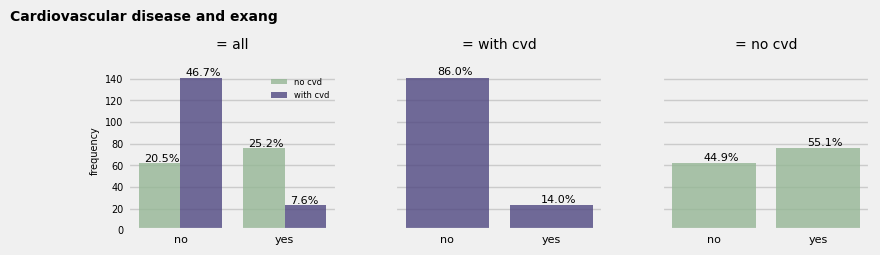

In [69]:
plt.style.use('fivethirtyeight')

for i in enumerate(category_var[4:5]):

    title=i[1]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(8,2.5), sharey=True, sharex=True)
    fig.suptitle('Cardiovascular disease and ' +  i[1] , fontsize=10, fontweight="bold", x=0.08)
    
    # = disease count plot
    sns.countplot(data=dfe, x=i[1],hue=dfe.target,palette=['darkseagreen', 'darkslateblue'], alpha=0.8, ax=ax1)
    ax1.set_title('= all', fontsize=10, pad=15)
    ax1.tick_params(axis='x', labelsize=8)
    ax1.tick_params(axis='y', labelsize=7)
    ax1.set_xlabel("",fontsize = 9)
    ax1.set_ylabel("frequency",fontsize = 7)
    ax1.legend(title='',frameon=False, fontsize=6,loc=0)
    totals = []
    for p in ax1.patches:
        totals.append(p.get_height())
        total = sum(totals)
    for p in ax1.patches:
        ax1.text(p.get_x()+.05, p.get_height()+1.5, \
                str(round((p.get_height()/total)*100, 1))+'%', fontsize=8,color='black')
                
    # = with disease count plot
    sns.countplot(data=wi_cvde, x=i[1], alpha=0.8, palette=['darkslateblue'], ax=ax2) 
    ax2.set_title('= with cvd', fontsize=10, pad=15)
    ax2.tick_params(axis='x', labelsize=8)
    ax2.tick_params(axis='y', labelsize=9)
    ax2.set_xlabel("",fontsize = 9)
    ax2.set_ylabel("",fontsize = 6)
    totals2 = []
    for p in ax2.patches:
        totals2.append(p.get_height())
        total2 = sum(totals2)
    for p in ax2.patches:
        ax2.text(p.get_x()+0.3, p.get_height()+2.5, \
                str(round((p.get_height()/total2)*100, 1))+'%', fontsize=8,color='black')
    
  # = no disease count plot
    sns.countplot(data=no_cvde, x=i[1], alpha=0.8, palette=['darkseagreen'], ax=ax3) 
    ax3.set_title('= no cvd', fontsize=10, pad=15)
    ax3.tick_params(axis='x', labelsize=8)
    ax3.tick_params(axis='y', labelsize=7)
    ax3.set_xlabel("",fontsize = 9)
    ax3.set_ylabel("",fontsize = 6)
    totals3 = []
    for p in ax3.patches:
        totals3.append(p.get_height())
        total3 = sum(totals3)
    for p in ax3.patches:
        ax3.text(p.get_x()+0.3, p.get_height()+2.5, \
                str(round((p.get_height()/total3)*100, 1))+'%', fontsize=8,color='black')   


fig.tight_layout(pad=0.5, w_pad=3.0)
plt.show() 

In [70]:
y=dfe['target'].count()

for i in enumerate(category_var[4:5]):

    print(colored(("Summary Statistics feature - " + i[1] + ":"),'green',attrs=['bold']))
    print("")
    def my_agg(x):
        names = {
            'patients'    : x[i[1]].count(),
            '%_of_pts'    : (x[i[1]].count()/y)*100,
            'mean_age'    : x['age'].mean(),
            'mean_oldpeak': x['oldpeak'].mean(),
            'mean_chol'   : x['chol'].mean(),
            'mean_thalach': x['thalach'].mean(),
            'mean_trestbps': x['trestbps'].mean()
        }
        
        return pd.Series(names, index=['patients','%_of_pts','mean_age','mean_oldpeak','mean_chol','mean_thalach',
                                      'mean_trestbps'])
    exang_stats = dfe.groupby(['target',i[1]]).apply(my_agg).round(2)
    print(np.transpose(exang_stats))

Summary Statistics feature - exang:

target        no cvd       with cvd      
exang             no   yes       no   yes
patients        62.0  76.0    141.0  23.0
%_of_pts        20.5  25.2     46.7   7.6
mean_age        57.0  56.2     52.4  53.6
mean_oldpeak     1.3   1.8      0.6   0.7
mean_chol      247.0 254.4    243.0 240.7
mean_thalach   146.2 133.3    159.7 150.2
mean_trestbps  133.6 135.1    129.5 127.5


**exang:** Of the patients with cvd, an overwhelming majority (nearly 86% of cohorts) reported no exercise induced angina pain. For those cohorts without the disease, it is almost equally likely for them to report angina pain as it was to report no angina pain (55% and 45%, respectively).

In [71]:
contingency_exang = pd.crosstab(dfe['exang'], dfe['target'])
print("Contingency Table:")
print(contingency_exang) 

Contingency Table:
target  no cvd  with cvd
exang                   
no          62       141
yes         76        23


In [72]:
chi, pval, dof, exp = chi2_contingency(contingency_exang)
for i in enumerate(category_var[4:5]):
    print(colored(("Chi-Squared Test Results " + "(" +  i[1] + " & cvd)"+": "),'green',attrs=['bold']))
    print("")
    print('p-value is: ', pval)
    significance = 0.05
    p = 1 - significance
    critical_value = chi2.ppf(p, dof)
    print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
    if chi > critical_value:
        print("""At %.2f level of significance, we reject the null hypotheses. They are not independent.""" % (significance))
    else:
        print("""At %.2f level of significance, we accept the null hypotheses. They are independent.""" % (significance)) 

Chi-Squared Test Results (exang & cvd): 

p-value is:  9.556466486179178e-14
chi=55.456203, critical value=3.841459

At 0.05 level of significance, we reject the null hypotheses. They are not independent.


### Chest pain (cp)

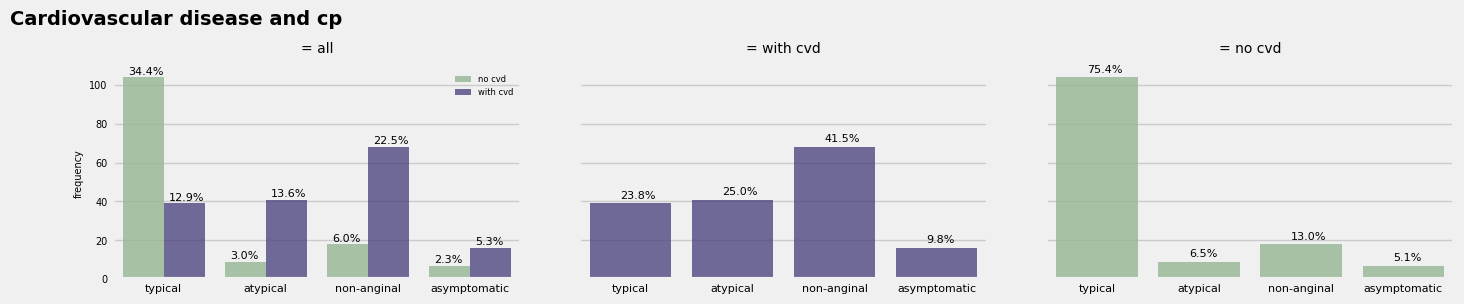

In [73]:
plt.style.use('fivethirtyeight')

for i in enumerate(category_var[1:2]):

    title=i[1]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(14,3), sharey=True)
    fig.suptitle('Cardiovascular disease and ' +  i[1] , fontsize=14, fontweight="bold", x=0.08)
    
    # = disease count plot
    sns.countplot(data=dfe, x=i[1],hue=dfe.target,palette=['darkseagreen', 'darkslateblue'], alpha=0.8, ax=ax1)
    ax1.set_title('= all', fontsize=10, pad=10)
    ax1.tick_params(axis='x', labelsize=8)
    ax1.tick_params(axis='y', labelsize=7)
    ax1.set_xlabel("",fontsize = 9)
    ax1.set_ylabel("frequency",fontsize = 7)
    ax1.legend(title='',frameon=False, fontsize=6,loc=1)
    totals = []
    for p in ax1.patches:
        totals.append(p.get_height())
        total = sum(totals)
    for p in ax1.patches:
        ax1.text(p.get_x()+.05, p.get_height()+1.5, \
                str(round((p.get_height()/total)*100, 1))+'%', fontsize=8,color='black')
                
    # = with disease count plot
    sns.countplot(data=wi_cvde, x=i[1], alpha=0.8, palette=['darkslateblue'], ax=ax2) 
    ax2.set_title('= with cvd', fontsize=10, pad=10)
    ax2.tick_params(axis='x', labelsize=8)
    ax2.tick_params(axis='y', labelsize=9)
    ax2.set_xlabel("",fontsize = 9)
    ax2.set_ylabel("",fontsize = 6)
    totals2 = []
    for p in ax2.patches:
        totals2.append(p.get_height())
        total2 = sum(totals2)
    for p in ax2.patches:
        ax2.text(p.get_x()+0.3, p.get_height()+2.5, \
                str(round((p.get_height()/total2)*100, 1))+'%', fontsize=8,color='black')
    
  # = no disease count plot
    sns.countplot(data=no_cvde, x=i[1], alpha=0.8, palette=['darkseagreen'], ax=ax3) 
    ax3.set_title('= no cvd', fontsize=10, pad=10)
    ax3.tick_params(axis='x', labelsize=8)
    ax3.tick_params(axis='y', labelsize=7)
    ax3.set_xlabel("",fontsize = 9)
    ax3.set_ylabel("",fontsize = 6)
    totals3 = []
    for p in ax3.patches:
        totals3.append(p.get_height())
        total3 = sum(totals3)
    for p in ax3.patches:
        ax3.text(p.get_x()+0.3, p.get_height()+2.5, \
                str(round((p.get_height()/total3)*100, 1))+'%', fontsize=8,color='black')   
        
fig.tight_layout(pad=0.5, w_pad=3.0)
plt.show()

In [74]:
y=dfe['target'].count()

for i in enumerate(category_var[1:2]):

    print(colored(("Summary Statistics feature - " + i[1] + ":"),'green',attrs=['bold']))
    print("")
    def my_agg(x):
        names = {
            'patients'    : x[i[1]].count(),
            '%_of_pts'    : (x[i[1]].count()/y)*100,
            'mean_age'    : x['age'].mean(),
            'mean_oldpeak': x['oldpeak'].mean(),
            'mean_chol'   : x['chol'].mean(),
            'mean_thalach': x['thalach'].mean(),
            'mean_trestbps': x['trestbps'].mean()
        }
        
        return pd.Series(names, index=['patients','%_of_pts','mean_age','mean_oldpeak','mean_chol','mean_thalach',
                                      'mean_trestbps'])
    cp_stats = dfe.groupby(['target',i[1]]).apply(my_agg).round(2)

Summary Statistics feature - cp:



In [75]:
(cp_stats).style \
          .background_gradient(cmap='Blues', axis=0) \
          .format('{0:,.1f}')

**cp:**  Of the patients with cvd, nearly half reported some type of angina pain (typical or atypical), and the other half reported no angina pain or were asymptomatic. A remarkable 75% of those cohorts who did not have cvd reported typical angina pain.  To understand what is meant by angina pain, let us describe chest pain type in some detail using definitions described by the "Text Book of Cardiology" website.  

"There are three characteristics used in classifying chest pain:

        >>Substernall chest discomfort of characteristic quality and duration
        >>Provoked by exertion or emotional stress
        >>Relieved by rest and/or nitroglycerine

Typical angina meets all three of the characteristics. Atypical angina meets two of these characteristics. Non-anginal chest pain meets one or none of the characteristics."[3]

In [76]:
contingency_cp = pd.crosstab(dfe['cp'], dfe['target'])
print("Contingency Table:")
print(contingency_cp)

Contingency Table:
target        no cvd  with cvd
cp                            
typical          104        39
atypical           9        41
non-anginal       18        68
asymptomatic       7        16


In [77]:
chi, pval, dof, exp = chi2_contingency(contingency_cp)
for i in enumerate(category_var[1:2]):
    print(colored(("Chi-Squared Test Results " + "(" +  i[1] + " & cvd)"+": "),'green',attrs=['bold']))
    print("")
    print('p-value is: ', pval)
    significance = 0.05
    p = 1 - significance
    critical_value = chi2.ppf(p, dof)
    print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
    if chi > critical_value:
        print("""At %.2f level of significance, we reject the null hypotheses. They are not independent.""" % (significance))
    else:
        print("""At %.2f level of significance, we accept the null hypotheses. They are independent.""" % (significance))

Chi-Squared Test Results (cp & cvd): 

p-value is:  1.8926838351935918e-17
chi=80.978762, critical value=7.814728

At 0.05 level of significance, we reject the null hypotheses. They are not independent.


### Resting electrocardiographic results (restecg)

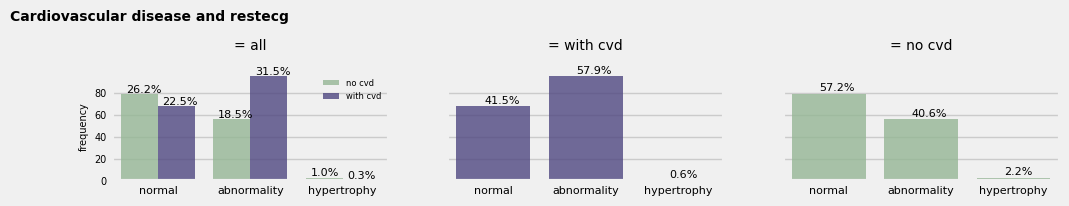

In [78]:
plt.style.use('fivethirtyeight')

for i in enumerate(category_var[3:4]):

    title=i[1]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,2), sharey=True)
    fig.suptitle('Cardiovascular disease and ' +  i[1] , fontsize=10, fontweight="bold", x=0.08)
    
    # = disease count plot
    sns.countplot(data=dfe, x=i[1],hue=dfe.target,palette=['darkseagreen', 'darkslateblue'], alpha=0.8, ax=ax1)
    ax1.set_title('= all', fontsize=10, pad=15)
    ax1.tick_params(axis='x', labelsize=8)
    ax1.tick_params(axis='y', labelsize=7)
    ax1.set_xlabel("",fontsize = 9)
    ax1.set_ylabel("frequency",fontsize = 7)
    ax1.legend(title='',frameon=False, fontsize=6,loc=1)
    totals = []
    for p in ax1.patches:
        totals.append(p.get_height())
        total = sum(totals)
    for p in ax1.patches:
        ax1.text(p.get_x()+.05, p.get_height()+1.5, \
                str(round((p.get_height()/total)*100, 1))+'%', fontsize=8,color='black')
        
    # = with disease count plot
    sns.countplot(data=wi_cvde, x=i[1], alpha=0.8, palette=['darkslateblue'], ax=ax2) 
    ax2.set_title('= with cvd', fontsize=10, pad=15)
    ax2.tick_params(axis='x', labelsize=8)
    ax2.tick_params(axis='y', labelsize=9)
    ax2.set_xlabel("",fontsize = 9)
    ax2.set_ylabel("",fontsize = 6)
    totals2 = []
    for p in ax2.patches:
        totals2.append(p.get_height())
        total2 = sum(totals2)
    for p in ax2.patches:
        ax2.text(p.get_x()+0.3, p.get_height()+2.5, \
                str(round((p.get_height()/total2)*100, 1))+'%', fontsize=8,color='black')
    
  # = no disease count plot
    sns.countplot(data=no_cvde, x=i[1], alpha=0.8, palette=['darkseagreen'], ax=ax3) 
    ax3.set_title('= no cvd', fontsize=10, pad=15)
    ax3.tick_params(axis='x', labelsize=8)
    ax3.tick_params(axis='y', labelsize=7)
    ax3.set_xlabel("",fontsize = 9)
    ax3.set_ylabel("",fontsize = 6)
    totals3 = []
    for p in ax3.patches:
        totals3.append(p.get_height())
        total3 = sum(totals3)
    for p in ax3.patches:
        ax3.text(p.get_x()+0.3, p.get_height()+2.5, \
                str(round((p.get_height()/total3)*100, 1))+'%', fontsize=8,color='black')   

fig.tight_layout(pad=0.5, w_pad=3.0)
plt.show()

In [79]:
y=dfe['target'].count()

for i in enumerate(category_var[3:4]):

    print(colored(("Summary Statistics feature - " + i[1] + ":"),'green',attrs=['bold']))
    print("")
    def my_agg(x):
        names = {
            'patients'    : x[i[1]].count(),
            '%_of_pts'    : (x[i[1]].count()/y)*100,
            'mean_age'    : x['age'].mean(),
            'mean_oldpeak': x['oldpeak'].mean(),
            'mean_chol'   : x['chol'].mean(),
            'mean_thalach': x['thalach'].mean(),
            'mean_trestbps': x['trestbps'].mean()
        }
        
        return pd.Series(names, index=['patients','%_of_pts','mean_age','mean_oldpeak','mean_chol','mean_thalach',
                                      'mean_trestbps'])
    restecg_stats = dfe.groupby(['target',i[1]]).apply(my_agg).round(2) 

Summary Statistics feature - restecg:



In [80]:
(restecg_stats).style \
          .background_gradient(cmap='Blues', axis=0) \
          .format('{0:,.1f}')

In [81]:
contingency_restecg = pd.crosstab(dfe['restecg'], dfe['target'])
print("Contingency Table:")
print(contingency_restecg)

Contingency Table:
target       no cvd  with cvd
restecg                      
normal           79        68
abnormality      56        95
hypertrophy       3         1


In [82]:
chi, pval, dof, exp = chi2_contingency(contingency_restecg)
for i in enumerate(category_var[3:4]):
    print(colored(("Chi-Squared Test Results " + "(" +  i[1] + " & cvd)"+": "),'green',attrs=['bold']))
    print("")
    print('p-value is: ', pval)
    significance = 0.05
    p = 1 - significance
    critical_value = chi2.ppf(p, dof)
    print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
    if chi > critical_value:
        print("""At %.2f level of significance, we reject the null hypotheses. They are not independent.""" % (significance))
    else:
        print("""At %.2f level of significance, we accept the null hypotheses. They are independent.""" % (significance))

Chi-Squared Test Results (restecg & cvd): 

p-value is:  0.007713053269318974
chi=9.729682, critical value=5.991465

At 0.05 level of significance, we reject the null hypotheses. They are not independent.


### Number of major vessels (ca)

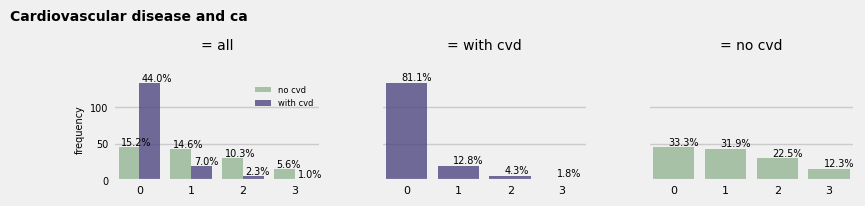

In [83]:
plt.style.use('fivethirtyeight')

for i in enumerate(category_var[6:7]):

    title=i[1]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(8,2), sharey=True)
    fig.suptitle('Cardiovascular disease and ' +  i[1] , fontsize=10, fontweight="bold", x=0.08)
    
    # = disease count plot
    sns.countplot(data=dfe, x=i[1],hue=dfe.target,palette=['darkseagreen', 'darkslateblue'], alpha=0.8, ax=ax1)
    ax1.set_title('= all', fontsize=10, pad=20)
    ax1.tick_params(axis='x', labelsize=8)
    ax1.tick_params(axis='y', labelsize=7)
    ax1.set_xlabel("",fontsize = 9)
    ax1.set_ylabel("frequency",fontsize = 7)
    ax1.legend(title='',frameon=False, fontsize=6,loc=1)
    totals = []
    for p in ax1.patches:
        totals.append(p.get_height())
        total = sum(totals)
    for p in ax1.patches:
        ax1.text(p.get_x()+.05, p.get_height()+1.5, \
                str(round((p.get_height()/total)*100, 1))+'%', fontsize=7,color='black')
                
    # = with disease count plot
    sns.countplot(data=wi_cvde, x=i[1], alpha=0.8, palette=['darkslateblue'], ax=ax2) 
    ax2.set_title('= with cvd', fontsize=10, pad=20)
    ax2.tick_params(axis='x', labelsize=8)
    ax2.tick_params(axis='y', labelsize=9)
    ax2.set_xlabel("",fontsize = 9)
    ax2.set_ylabel("",fontsize = 6)
    totals2 = []
    for p in ax2.patches:
        totals2.append(p.get_height())
        total2 = sum(totals2)
    for p in ax2.patches:
        ax2.text(p.get_x()+0.3, p.get_height()+2.5, \
                str(round((p.get_height()/total2)*100, 1))+'%', fontsize=7,color='black')
    
  # = no disease count plot
    sns.countplot(data=no_cvde, x=i[1], alpha=0.8, palette=['darkseagreen'], ax=ax3) 
    ax3.set_title('= no cvd', fontsize=10, pad=20)
    ax3.tick_params(axis='x', labelsize=8)
    ax3.tick_params(axis='y', labelsize=7)
    ax3.set_xlabel("",fontsize = 9)
    ax3.set_ylabel("",fontsize = 6)
    totals3 = []
    for p in ax3.patches:
        totals3.append(p.get_height())
        total3 = sum(totals3)
    for p in ax3.patches:
        ax3.text(p.get_x()+0.3, p.get_height()+2.5, \
                str(round((p.get_height()/total3)*100, 1))+'%', fontsize=7,color='black')   

fig.tight_layout(pad=0.5, w_pad=3.0)
plt.show()

In [84]:
y=dfe['target'].count()

for i in enumerate(category_var[6:7]):

    #print(colored(("Summary Statistics feature - " + i[1] + ":"),'green',attrs=['bold']))
    print("")
    def my_agg(x):
        names = {
            'patients'    : x[i[1]].count(),
            '%_of_pts'    : (x[i[1]].count()/y)*100,
            'mean_age'    : x['age'].mean(),
            'mean_oldpeak': x['oldpeak'].mean(),
            'mean_chol'   : x['chol'].mean(),
            'mean_thalach': x['thalach'].mean(),
            'mean_trestbps': x['trestbps'].mean()
        }
        
        return pd.Series(names, index=['patients','%_of_pts','mean_age','mean_oldpeak','mean_chol','mean_thalach',
                                      'mean_trestbps'])
    ca_stats = dfe.groupby(['target',i[1]]).apply(my_agg).round(2)

In [85]:
for i in enumerate(category_var[6:7]):

    print(colored(("Summary Statistics feature - " + i[1] + ":"),'green',attrs=['bold']))

ca_stats.style \
        .background_gradient(cmap='Blues', axis=0) \
        .format('{0:,.1f}')

Summary Statistics feature - ca:


In [86]:
contingency_ca = pd.crosstab(dfe['ca'], dfe['target'])
print("Contingency Table:")
print(contingency_ca)

Contingency Table:
target  no cvd  with cvd
ca                      
0           46       133
1           44        21
2           31         7
3           17         3


In [87]:
chi, pval, dof, exp = chi2_contingency(contingency_ca)
for i in enumerate(category_var[6:7]):
    print(colored(("Chi-Squared Test Results " + "(" +  i[1] + " & cvd)"+": "),'green',attrs=['bold']))
    print("")
    print('p-value is: ', pval)
    significance = 0.05
    p = 1 - significance
    critical_value = chi2.ppf(p, dof)
    print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
    if chi > critical_value:
        print("""At %.2f level of significance, we reject the null hypotheses. They are not independent.""" % (significance))
    else:
        print("""At %.2f level of significance, we accept the null hypotheses. They are independent.""" % (significance))

Chi-Squared Test Results (ca & cvd): 

p-value is:  6.919066104481066e-16
chi=73.689042, critical value=7.814728

At 0.05 level of significance, we reject the null hypotheses. They are not independent.


# Logistic Regression

**Using Logistic Regression to predict an outcome whether or not a person has heart disease**

We will be using the predictor variables (independent features) we analyzed from our data to predict the outcome for cvd, where cvd is the target (dependent) response variable. A Logistic Regression model will be fitted against our data to predict outcomes.  The Logistic Regression machine learning algorithm is suited for our dataframe given that our response variable is binary.

**We will evaluate prediction accuracy scores comparing the results of the model for the following scenarios:**

- <span style="color:blue">**S1:** Benchmark. No feature scaling (Normalization/ Standardization of numeric features).
- <span style="color:blue">**S2:** Normalized numeric features. 
- <span style="color:blue">**S3:** Standardized numeric features.

**Note:** We scale our data (normalize or standardize) so as to not bias the prediction model towards features with values that are comparably higher in magnitude. For example features oldpeak and cholesterol level run on different scales with cholesterol on a much higher scale (range).  Since both the features have different scales, we may encounter issues where the cholesterol feature is given greater weight for predicting an outcome for cvd. Scaling can mitigate our machine learning algorithm from being biased towards the larger scaled features.

## Logistic Regression Scenario 1 (benchmark)
**S1:** No normalization, no standardization of numeric features.

In [88]:
#One-hot-coding categorical features
dfm_dummy = pd.get_dummies(dfm, columns=(category_var[:-1]), drop_first=True)

# spliting training and testing data
X = dfm_dummy.drop(['target'], axis=1)
y = dfm_dummy['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=20)

# define and configure the model
lr_model_b = LogisticRegression()

#train the model using training data; X contains the predictor features, Y contains the target (predicted value)
lr_model_b.fit(X_train, y_train)

#predict a response (target outcome) to the X_test data
y_pred = lr_model_b.predict(X_test)

# evaluate the model comparing the predicted cvd response for test data vs. the actual cvd repsonse for test data
test_data_accuracy_base = accuracy_score(y_pred, y_test)
print('Accuracy of model S1: ', test_data_accuracy_base)

Accuracy of model S1:  0.8131868131868132


## Logistic Regression Scenario 2
**S2:** Normalized numeric features.

In [89]:
# copy of datasets
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

# # It is a good practice to fit the scaler on the training data and then use it to transform the testing data. 
# # This would avoid any data leakage during the model testing process.

# apply normalization on numerical features
for i in numeric_var:
    
    # fit on training data column
    scale =MinMaxScaler().fit(X_train_norm[[i]])
    
    # transform the training data column
    X_train_norm[i] = scale.transform(X_train_norm[[i]])
    
    # transform the testing data column
    X_test_norm[i] = scale.transform(X_test_norm[[i]])

# define and configure the model
lr_model_n = LogisticRegression()

#train the model using training data; X contains the predictor features, Y contains the target (predicted value)
lr_model_n.fit(X_train_norm, y_train)

#predict a response (target outcome) to the test data
y_pred = lr_model_n.predict(X_test_norm)

# evaluate the model
test_data_accuracy_norm= accuracy_score(y_pred, y_test)
print("Accuracy of the model S2 is:", test_data_accuracy_norm)

Accuracy of the model S2 is: 0.8351648351648352


## Logistic Regression Scenario 3
**S3:** Standardized numeric features.

In [90]:
# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# apply standardization on numerical features
for i in numeric_var:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

# define and configure the model
lr_model_s = LogisticRegression()

#train the model using training data; X contains the predictor features, Y contains the target (predicted value)
lr_model_s.fit(X_train_stand, y_train)

#predict a response (target outcome) to the test data
y_pred = lr_model_s.predict(X_test_stand)

# evaluate the model
test_data_accuracy_stand= accuracy_score(y_pred, y_test)
print("Accuracy of the model S3 is:", test_data_accuracy_stand)

Accuracy of the model S3 is: 0.8901098901098901


In [91]:
# Print Accuracy Scores
print(colored(("Accuracy scores of the S1 - S3 models:"),'green',attrs=['bold']))
print("")
print("""Accuracy of the model S1 is: %.2f """ % (test_data_accuracy_base*100))
print("""Accuracy of the model S2 is: %.2f """ % (test_data_accuracy_norm*100))
print("""Accuracy of the model S3 is: %.2f """ % (test_data_accuracy_stand*100))

Accuracy scores of the S1 - S3 models:

Accuracy of the model S1 is: 81.32 
Accuracy of the model S2 is: 83.52 
Accuracy of the model S3 is: 89.01 


**Observations:** Achieving an accuracy score of 89.01%, our standardized dataset outperforms the normalized model which achieved an accuracy score of 83.52%. The unscaled model preformed the least desirable results than either scaled models, achieving an accuracy score of 81.32%. In the boxplot figure below we chart the numeric features for the original and scaled datasets.  Note how the standardized features are the most comparable to one another allowing the regression model to ingest the effects of the variables on a more leveled scale. We will use the results of the standardized model to interpret and evaluate our prediction results. 

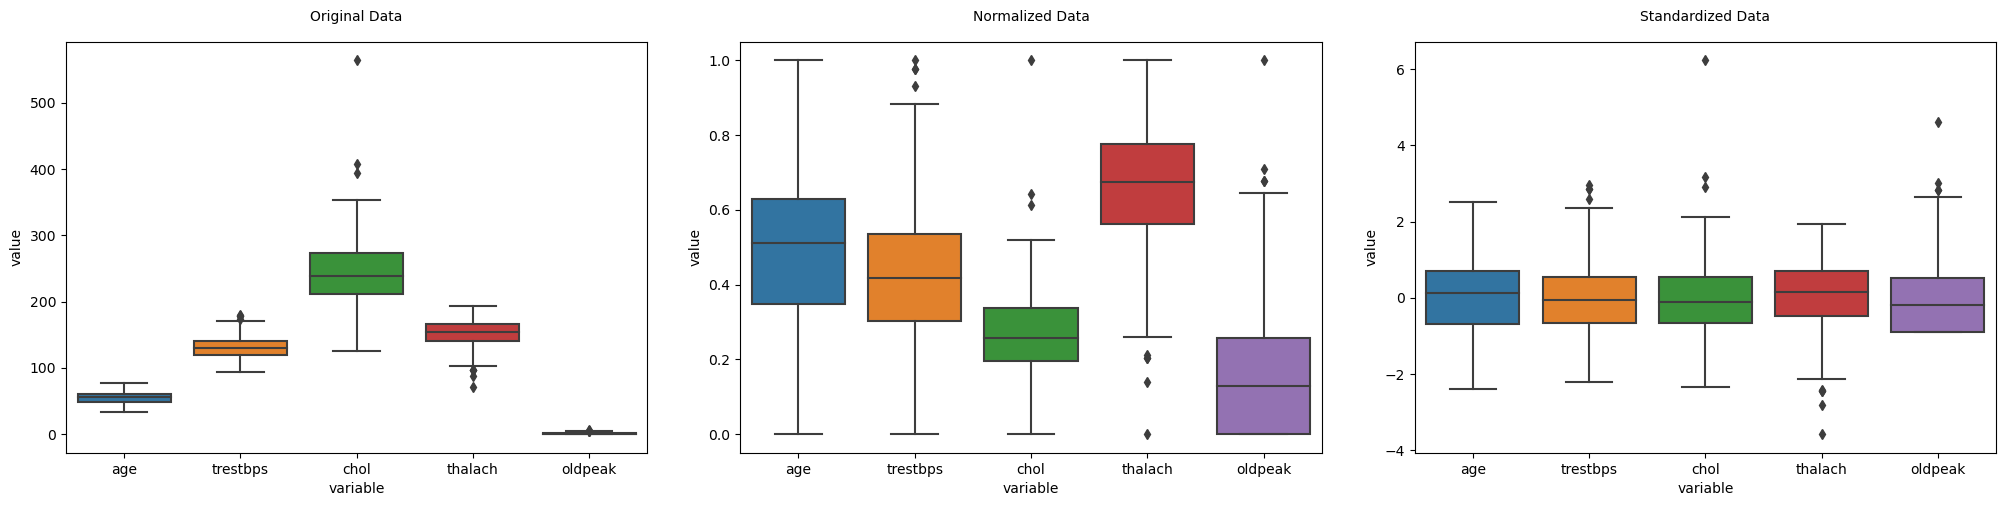

In [92]:
plt.style.use('default')
X_train_numeric = X_train[numeric_var]
X_train_norm_numeric = X_train_norm[numeric_var]
X_train_stand_numeric = X_train_stand[numeric_var]

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,5))

# = boxplot benckmark data
sns.boxplot(x="variable", y="value", data=pd.melt(X_train_numeric), ax=ax1)
ax1.set_title('Original Data', fontsize=10, pad=15)
# = boxplt normalized data
sns.boxplot(x="variable", y="value", data=pd.melt(X_train_norm_numeric), ax=ax2)
ax2.set_title('Normalized Data', fontsize=10, pad=15)
# = boxplot standardized data
sns.boxplot(x="variable", y="value", data=pd.melt(X_train_stand_numeric), ax=ax3)
ax3.set_title('Standardized Data', fontsize=10, pad=15)
fig.tight_layout(pad=0.5, w_pad=3.0)
plt.show()

In [93]:
print(colored(("Classification Report: "),'green',attrs=['bold']))
print(classification_report(y_test ,y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.95      0.88        40
           1       0.96      0.84      0.90        51

    accuracy                           0.89        91
   macro avg       0.89      0.90      0.89        91
weighted avg       0.90      0.89      0.89        91



In [94]:
print(colored(("Confusion Matrix: "),'green',attrs=['bold']))
unique_label = np.unique([y_test, y_pred])
cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels=unique_label), 
    index=['actual:{:}'.format(x) for x in unique_label], 
    columns=['predicted:{:}'.format(x) for x in unique_label]
)
print(cm)

Confusion Matrix: 
          predicted:0  predicted:1
actual:0           38            2
actual:1            8           43


In [95]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("True Positives: ",tp)
print("False Positives (type 1 error): ",fp)
print("False Negatives (type 2 error): ",fn)

print("")

#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy Score: {:0.2f}".format(Accuracy))

#Precision 
Precision = (tp/(tp+fp))*100 
print("Precision Score(TP Rate): {:0.2f}".format(Precision))

#Recall 
Recall = (tp/(tp+fn))* 100
print("Recall Score (percent of the positive cases caught): {:0.2f}".format(Recall))

#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1-Score (weighted harmonic mean of precision and recall): {:0.2f}".format(f1))

#Specificity 
Specificity = (tn/(tn+fp))*100
print("Specificity (TN Rate): {:0.2f}".format(Specificity))

True Negatives:  38
True Positives:  43
False Positives (type 1 error):  2
False Negatives (type 2 error):  8

Accuracy Score: 89.01
Precision Score(TP Rate): 95.56
Recall Score (percent of the positive cases caught): 84.31
F1-Score (weighted harmonic mean of precision and recall): 89.58
Specificity (TN Rate): 95.00


## **Conclusion:** 

In this study, we analyzed the features widely considered to be predictors for heart disease. Our analysis involved measuring the relationship between the numerical features **(chol, age, thalach, oldpeak and trestbps)** and the response variable **(target).** Without quantifying a weight for an association between the categorical features **(sex, slope, thal, fbs, exang, cp, restecg, ca)** and the response variable, we assigned a dependent or independent relationship between the categorical attributes and the target variable.  Our statistical test for significance on the numerical features concluded that age, oldpeak and thalach resulted in a p-value that was statistically significant.  These numeric attributes are not independent of the response variable for indicating the presence of cvd.  On the other hand, the numeric features chol and trestbps on their own were shown to be independent of the response variable. Of the categorical features, all but fbs were shown to have a relationship with the response variable.   

Using Logistic Regression we modeled the probability that a patient has cvd given the measures and features described above.  **With a high degree of accuracy, our model was able to achieve a prediction score of 89.0%.**  This tells us that for the 91 observations (test patients) used in the model (where the model was fitted against training data for 211 patients), the model correctly predicted whether or not a patient had cvd 89.0% of the time.  With room for some improvement on accuracy, the overall Precision of the model performed desirably at 95.6%.  The precision describes the True Positive Rate where our model accurately predicted a condition for cvd. The Specificity Rate which describes our True Negative Rate, or the instances where our model accurately predicted for no disease, met a score of 95%.   

The implications for using machine learning models to detect the presence of disease are far reaching and inevitably can lead to improved health outcomes for those suffering from diseases.  Implementing Machine Learning techniques for disease detection for cvd and other disease can allow clinicians and practitioners to apply interventions such as disease management, counseling, and medication therapy during the early stages of the disease and prior to its significant progression. Such measures can then lead to a reduction in premature disabilities, injuries and mortality rate.  

**References**
<ol>
<p>1.WHO: <span style="color:blue"> https://www.who.int/cardiovascular_diseases/guidelines/Full%20text.pdf<p>
<p>2.Everyday Health: <span style="color:blue"> https://www.everydayhealth.com/heart-health-pictures/the-single-best-predictor-of-a-heart-attack.aspx<p>
<p>3.Text Book of Cardiology: <span style="color:blue"> https://www.textbookofcardiology.org/wiki/Chest_Pain_/_Angina_Pectoris<p>

In [96]:
#Export pre-processed dataset. Utilize file to story point analysis in tableau.
dfe.to_excel(r'/Users/samiai.masri/Documents/MastersProgram/6_Python/Capstone_Project/CVD.xlsx', index = False)